# Loading the data #

In [108]:
!pip install scipy numpy matplotlib pandas sklearn

In [109]:
# If the data is from .mat file 
from scipy.io import loadmat

data = loadmat('mydata.mat')
mydata = data['mydata']


FileNotFoundError: [Errno 2] No such file or directory: 'mydata.mat'

In [64]:
# If the data is in .csv

import pandas as pd

mydata = pd.read_csv('/Users/anastasia/Dropbox/Sleeper/sleep_onset_analysis/regression_so_samples_sbj2_sbj460.csv')

In [65]:
mydata

Label  Sbj_ID  delta_power  theta_power  alpha_power  beta_power  \
0      30.0       2    -2.480271    -2.864198    -2.560953   -3.247082   
1      29.9       2    -2.480271    -2.864198    -2.560953   -3.247082   
2      29.8       2    -4.848356    -5.818253    -5.394159   -5.888045   
3      29.7       2    -4.311651    -5.512524    -5.653679   -5.929292   
4      29.6       2    -4.311651    -5.512524    -5.653679   -5.929292   
...     ...     ...          ...          ...          ...         ...   
4120    1.0     460    -6.040106    -4.565390    -5.969957   -7.642545   
4121    0.9     460    -4.983741    -4.309748    -5.087293   -7.569674   
4122    0.8     460    -5.165626    -5.210942    -5.184448   -7.196547   
4123    0.7     460    -4.512469    -5.228269    -5.360132   -7.692482   
4124    0.6     460    -4.967099    -5.105121    -4.882700   -6.322275   

      gamma_power  Delta_to_theta_ratio  Delta_to_alpha_ratio  \
0       -4.445265              0.383928              0.080683   
1       -4.445265              0.383928              0.080683   
2       -8.615530              0.969897              0.545803   
3       -8.556709              1.200873              1.342028   
4       -8.556709              1.200873              1.342028   
...           ...                   ...                   ...   
4120   -10.783181             -1.474716             -0.070149   
4121   -10.258815             -0.673994              0.103552   
4122    -9.983449              0.045316              0.018822   
4123   -10.094764              0.715800              0.847663   
4124    -9.939891              0.138022             -0.084398   

      Delta_to_beta_ratio  ...  FC_LocalSimple_mean3_stderr  Entropy_Rate_CTW  \
0                0.766811  ...                     0.270287          0.285799   
1                0.766811  ...                     0.270287          0.285799   
2                1.039689  ...                     0.635773          0.605375   
3                1.617641  ...                     0.606098          0.601843   
4                1.617641  ...                     0.606098          0.601843   
...                   ...  ...                          ...               ...   
4120             1.602439  ...                     0.408057          0.398628   
4121             2.585932  ...                     0.349000          0.339894   
4122             2.030921  ...                     0.449386          0.421669   
4123             3.180013  ...                     0.407830          0.421269   
4124             1.355176  ...                     0.473414          0.406792   

      Entropy_Rate_LZ  Aperiodic_component  Monophasic_vertices_count,  \
0            0.272204             0.673053                         0.0   
1            0.272204             0.673053                         0.0   
2            0.633995             1.284077                         0.0   
3            0.613321             1.287597                         0.0   
4            0.613321             1.287597                         0.0   
...               ...                  ...                         ...   
4120         0.399693             1.938732                         0.0   
4121         0.348008             1.899447                         0.0   
4122         0.406584             1.878402                         0.0   
4123         0.404287             1.978519                         0.0   
4124         0.406584             1.853714                         0.0   

      Biphasic_vertices_count,  Sleep_spindles_count,  K_complex_count,  \
0                          0.0               1.000000               0.0   
1                          0.0               1.000000               0.0   
2                          0.0               2.000000               0.0   
3                          0.0               0.500000               0.0   
4                          0.0               0.500000               0.0   
...                     

In [66]:
# Search for missing values
mydata.isnull().sum()



Label                         0
Sbj_ID                        0
delta_power                 328
theta_power                 328
alpha_power                 328
                           ... 
Biphasic_vertices_count,    328
Sleep_spindles_count,       328
K_complex_count,            328
O-information                 6
S-information                 0
Length: 69, dtype: int64

In [67]:
# For NaN values in all columns, delete the row
mydata = mydata.dropna(how='any',axis=0)




In [68]:
# Show whether there are any missing values
mydata.isnull().values.any()

False

In [69]:
mydata.isnull().sum()

Label                       0
Sbj_ID                      0
delta_power                 0
theta_power                 0
alpha_power                 0
                           ..
Biphasic_vertices_count,    0
Sleep_spindles_count,       0
K_complex_count,            0
O-information               0
S-information               0
Length: 69, dtype: int64

In [70]:
# Check whether there are any infinite values
mydata.isin([np.inf, -np.inf]).sum()


Label                       0
Sbj_ID                      0
delta_power                 0
theta_power                 0
alpha_power                 0
                           ..
Biphasic_vertices_count,    0
Sleep_spindles_count,       0
K_complex_count,            0
O-information               0
S-information               0
Length: 69, dtype: int64

In [81]:
# Swap infinite values with very large numbers
mydata = mydata.replace([np.inf, -np.inf], 10000000)


In [82]:
# Create X (3:end columns) and y (1st column) from the table 
X = mydata.iloc[:, 2:].values
y = mydata.iloc[:, 0].values
X.shape, y.shape

((3791, 67), (3791,))

In [75]:
y

array([30. , 29.9, 29.8, ...,  0.8,  0.7,  0.6])

# Regression from single feature veactor of extracted EEG period 

In [48]:
!pip install scikit-learn

## Random forest ##


In [49]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
# Split the data in the train, evaluation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)


# Evaluate the model using cross-validation and save the predictions

#predictions = cross_val_predict(rf_regressor, X_train, y_train, cv=10)



# Make predictions on the test set (initial results)
#predictions = rf_regressor.predict(X_test)

In [77]:
# Evaluate the model using cross-validation and save the predictions
predictions = cross_val_predict(rf_regressor, X_train, y_train, cv=10)


# Calculate the mean absolute error
errors = abs(predictions - y_train)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'minutes.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_train)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 2.3 minutes.
Accuracy: 57.49 %.


Mean squared error:  15.028552120606617
Root mean squared error:  3.876667656713252
R-squared score:  0.7799086399211629


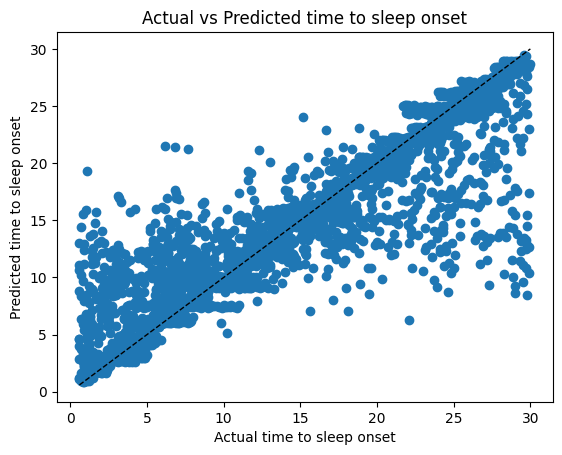

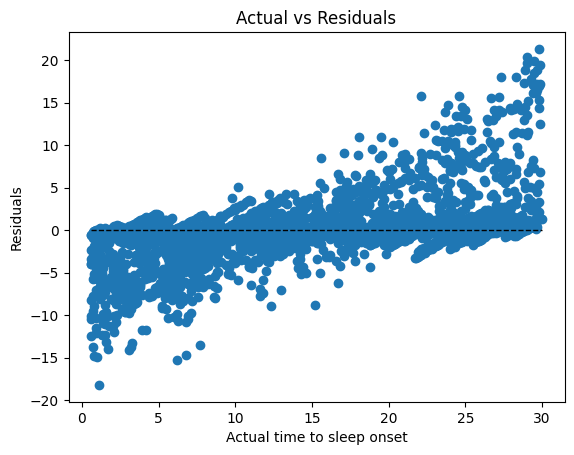

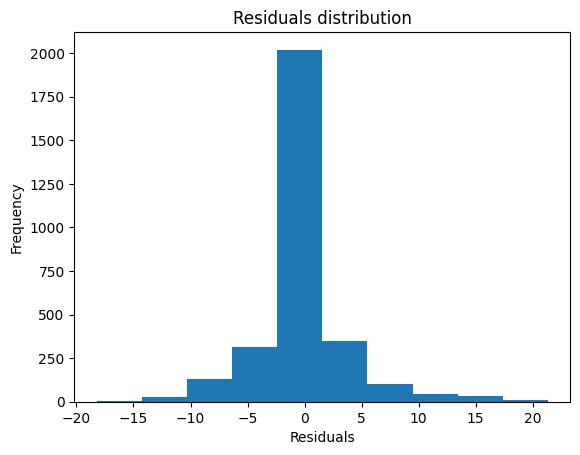

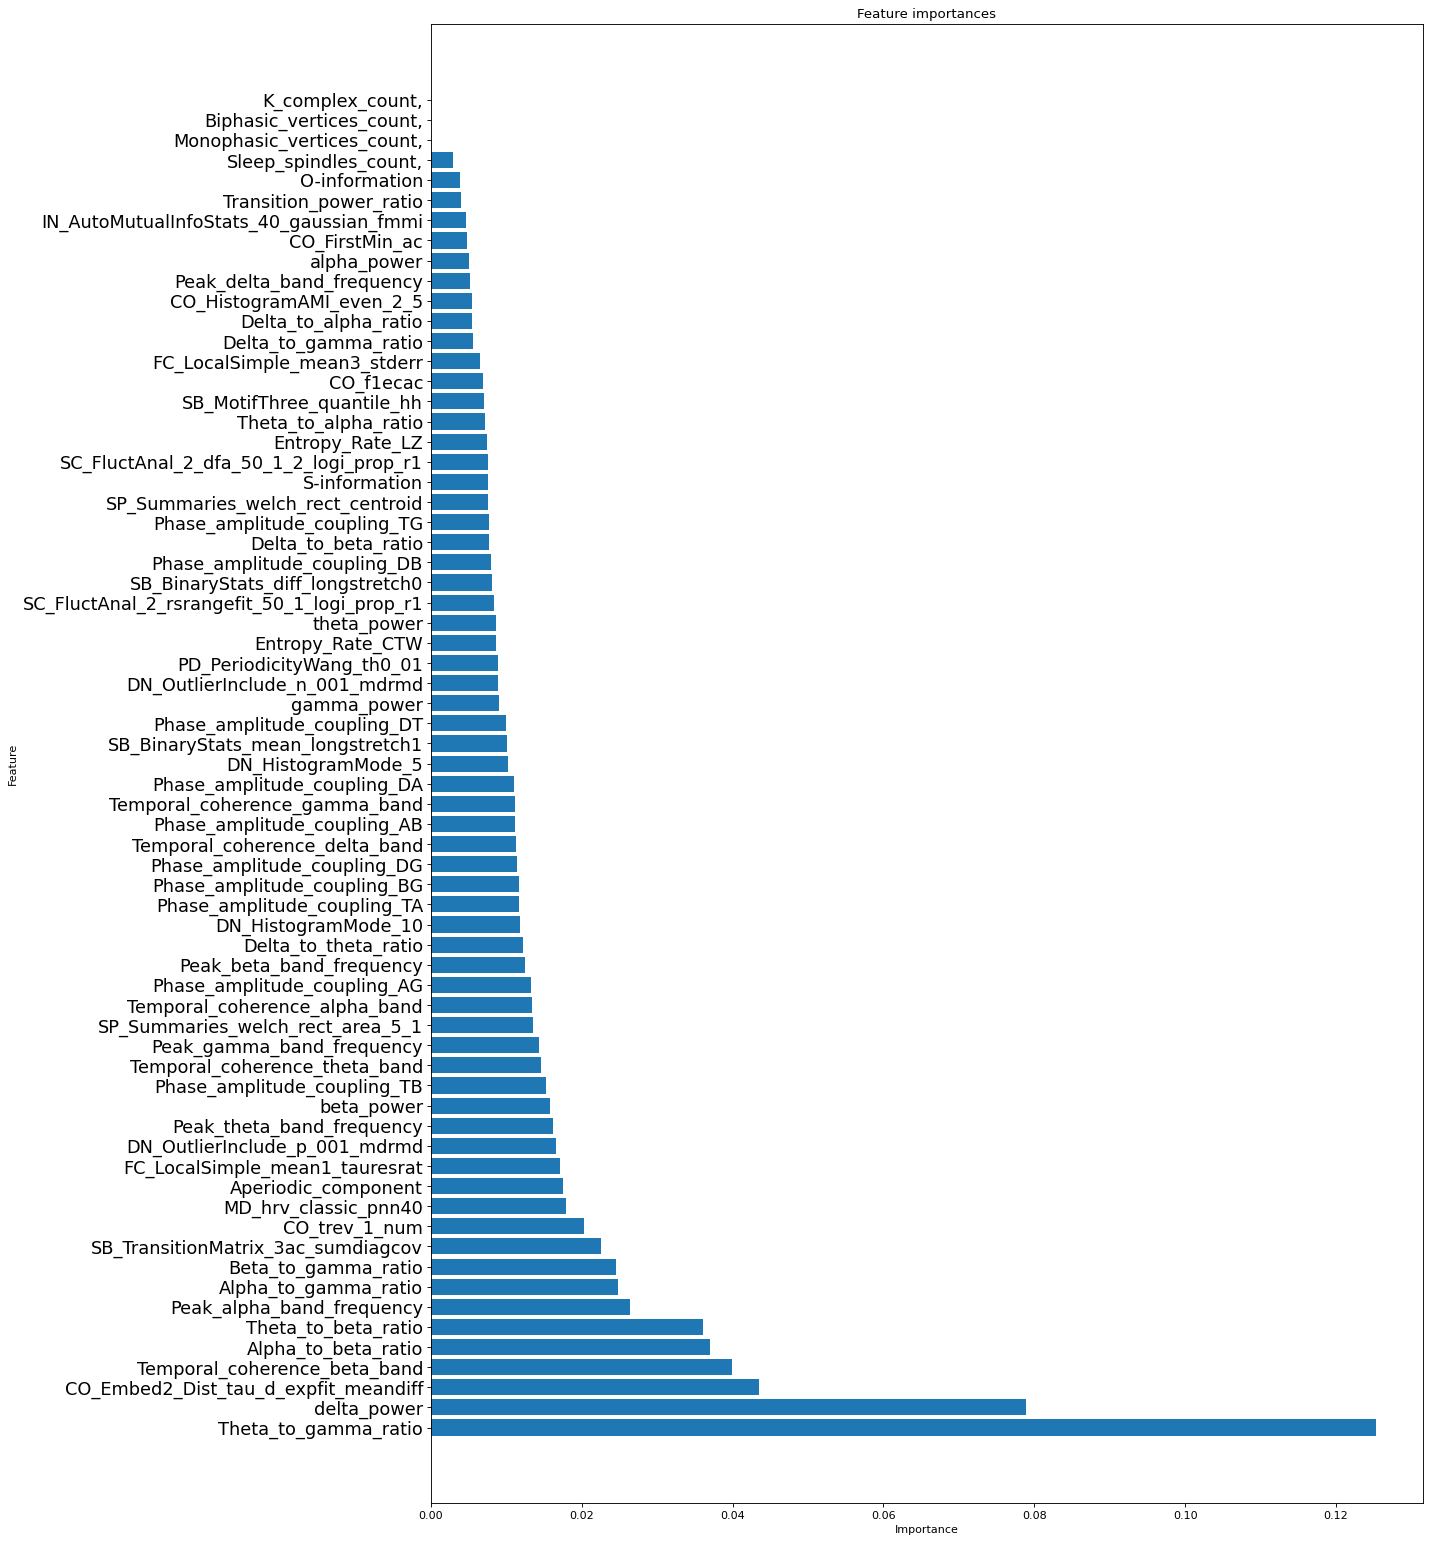

In [78]:

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate the mean squared error
mse = mean_squared_error(y_train, predictions)
# Calculate the root mean squared error
rmse = np.sqrt(mse)
# Calculate the R-squared score
r2 = r2_score(y_train, predictions)

print('Mean squared error: ', mse)
print('Root mean squared error: ', rmse)
print('R-squared score: ', r2)

# Plot the predictions vs the actual values and reference line

plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=1)
plt.scatter(y_train, predictions)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted time to sleep onset')
plt.show()

# Plot the residuals with a reference line at 0
residuals = y_train - predictions
plt.scatter(y_train, residuals)
plt.plot([y_train.min(), y_train.max()], [0, 0], 'k--', lw=1)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Residuals')
plt.title('Actual vs Residuals')
plt.show()

# Plot the residuals distribution

plt.hist(residuals)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals distribution')
plt.show()

# Plot the sorted feature importances in a long horizontal bar chart and increased font size

# Create plot
#plt.figure()

# Create plot title
#plt.title("Feature Importance")

# Add bars
#plt.bar(range(X.shape[1]), importances[indices])


importances = rf_regressor.feature_importances_

# sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange the feature names so they match the sorted feature importances
names = [mydata.columns[i+2] for i in indices]

fig, ax = plt.subplots(figsize=(16, 24), dpi=80)

ax.barh(range(X.shape[1]), importances[indices], align='center')
ax.set_yticks(range(X.shape[1]))
ax.set_yticklabels(names, fontsize=16)

ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature importances')
plt.show()


# Plot the feature importances in a vertical bar chart
#plt.bar(range(X.shape[1]), importances)
#plt.xticks(range(X.shape[1]), mydata.columns[2:], rotation=90)
#plt.xlabel('Features')
#plt.ylabel('Importance')
#plt.title('Feature importances')
#plt.show()



#importances = rf_regressor.feature_importances_
#plt.bar(range(X.shape[1]), importances)
#plt.xticks(range(X.shape[1]), mydata.columns[2:], rotation=90)
#plt.xlabel('Features')
#plt.ylabel('Importance')
#plt.title('Feature importances')
#plt.show()



### Rank the feature importance

In [79]:
# Get feature importances
importances = rf_regressor.feature_importances_

# Convert the importances into a DataFrame

feature_importances = pd.DataFrame({"feature": mydata.columns[2:], "importance": importances})

#feature_importances = pd.DataFrame({"feature": df.columns, "importance": importances})

# Sort the DataFrame to show the features with the highest importance first
feature_importances = feature_importances.sort_values(by="importance", ascending=False)

print(feature_importances)

                                 feature  importance
11                  Theta_to_gamma_ratio    0.125257
0                            delta_power    0.078945
46  CO_Embed2_Dist_tau_d_expfit_meandiff    0.043477
24          Temporal_coherence_beta_band    0.039899
12                   Alpha_to_beta_ratio    0.037034
..                                   ...         ...
65                         O-information    0.003878
63                 Sleep_spindles_count,    0.002888
61            Monophasic_vertices_count,    0.000000
62              Biphasic_vertices_count,    0.000000
64                      K_complex_count,    0.000000

[67 rows x 2 columns]


### Perform feature selection

In [83]:
# Decide on the number of features to select (e.g., the top 50%)
k = len(mydata.columns) *60 // 100

# Select the top k features

top_k_features = feature_importances["feature"][:k]
top_k_features




11                    Theta_to_gamma_ratio
0                              delta_power
46    CO_Embed2_Dist_tau_d_expfit_meandiff
24            Temporal_coherence_beta_band
12                     Alpha_to_beta_ratio
10                     Theta_to_beta_ratio
18               Peak_alpha_band_frequency
13                    Alpha_to_gamma_ratio
14                     Beta_to_gamma_ratio
44      SB_TransitionMatrix_3ac_sumdiagcov
41                           CO_trev_1_num
42                    MD_hrv_classic_pnn40
60                     Aperiodic_component
48          FC_LocalSimple_mean1_tauresrat
49           DN_OutlierInclude_p_001_mdrmd
17               Peak_theta_band_frequency
3                               beta_power
31             Phase_amplitude_coupling_TB
22           Temporal_coherence_theta_band
20               Peak_gamma_band_frequency
51        SP_Summaries_welch_rect_area_5_1
23           Temporal_coherence_alpha_band
34             Phase_amplitude_coupling_AG
19         

In [84]:
# Create a new subset of the data with only the selected features
X_subset = mydata[top_k_features]

# Split the data in the train and test
X_train_after_selection, X_test_after_selection, y_train_after_selection, y_test_after_selection = train_test_split(X_subset, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor_after_selection = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor_after_selection.fit(X_train_after_selection, y_train_after_selection)

# Evaluate the model using cross-validation and save the predictions
predictions_after_selection = cross_val_predict(rf_regressor_after_selection, X_train_after_selection, y_train_after_selection, cv=10)


# Make predictions on the test set (initial results)
#predictions_after_selection = rf_regressor_after_selection.predict(X_test_after_selection)




In [85]:
X_subset

Theta_to_gamma_ratio  delta_power  CO_Embed2_Dist_tau_d_expfit_meandiff  \
0                 1.884311    -2.480271                              0.270527   
1                 1.884311    -2.480271                              0.270527   
2                 3.221371    -4.848356                              0.474530   
3                 2.903030    -4.311651                              0.464315   
4                 2.903030    -4.311651                              0.464315   
...                    ...          ...                                   ...   
4120              4.813224    -6.040106                              0.940507   
4121              5.171522    -4.983741                              1.176167   
4122              4.799001    -5.165626                              0.805235   
4123              4.734632    -4.512469                              0.913967   
4124              5.057190    -4.967099                              0.739875   

      Temporal_coherence_beta_band  Alpha_to_beta_ratio  Theta_to_beta_ratio  \
0                         0.058286             1.198183             0.686128   
1                         0.058286             1.198183             0.686128   
2                         0.136872             2.727485             0.493886   
3                         0.153791             2.627417             0.275613   
4                         0.153791             2.627417             0.275613   
...                            ...                  ...                  ...   
4120                      0.130220             3.140635             1.672588   
4121                      0.131121             2.689141             2.482381   
4122                      0.123148             2.786902             2.012099   
4123                      0.126960             2.402282             2.332350   
4124                      0.133463             3.617616             1.439575   

      Peak_alpha_band_frequency  Alpha_to_gamma_ratio  Beta_to_gamma_ratio  \
0                      5.833333              1.581066             1.964994   
1                      5.833333              1.581066             1.964994   
2                     10.250000              2.797277             3.767174   
3                      9.583333              3.044185             4.245058   
4                      9.583333              3.044185             4.245058   
...                         ...                   ...                  ...   
4120                   8.166667              6.217791             4.743074   
4121                   8.166667              5.949067             5.275073   
4122                   8.333333              4.772507             4.817823   
4123                   8.888889              4.866496             5.582295   
4124                   9.083333              4.834770             4.972792   

      SB_TransitionMatrix_3ac_sumdiagcov  ...  Temporal_coherence_gamma_band  \
0                               0.052083  ...                       0.070392   
1                               0.052083  ...                       0.070392   
2                               0.047653  ...                       0.135022   
3                               0.040247  ...                       0.135231   
4                               0.040247  ...                       0.135231   
...                                  ...  ...                            ...   
4120                            0.001347  ...                       0.161723   
4121                            0.031632  ...                       0.166143   
4122                            0.015382  ...                       0.152373   
4123                            0.016718  ...                       0.156019   
4124                            0.061096  ...                       0.166716   

      Phase_amplitude_coupling_DA  DN_HistogramMode_5  \
0                        0.155961           -0.112627   
1                        0.155961           -0.112627   
2  

Mean squared error:  15.06326365145577
Root mean squared error:  3.88114205504717
R-squared score:  0.7794002936763818


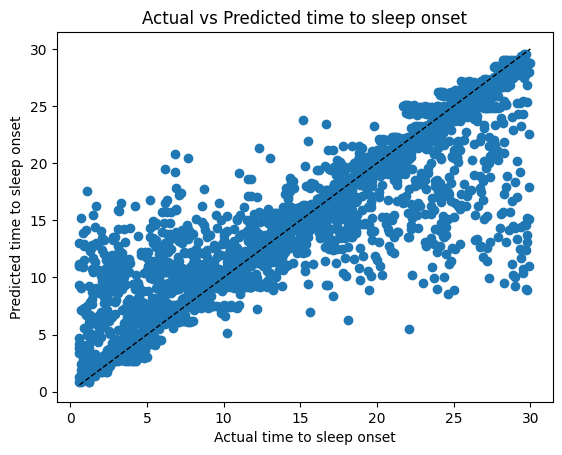

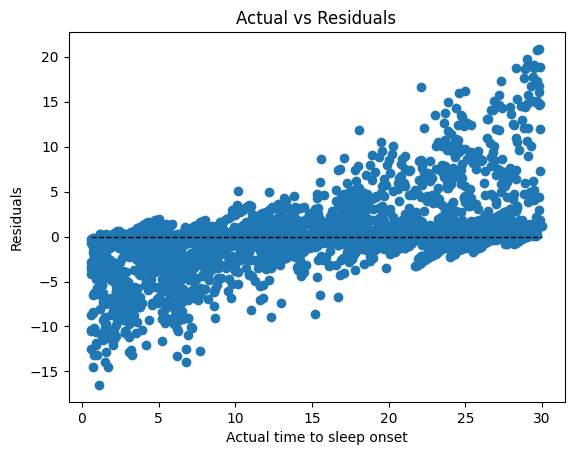

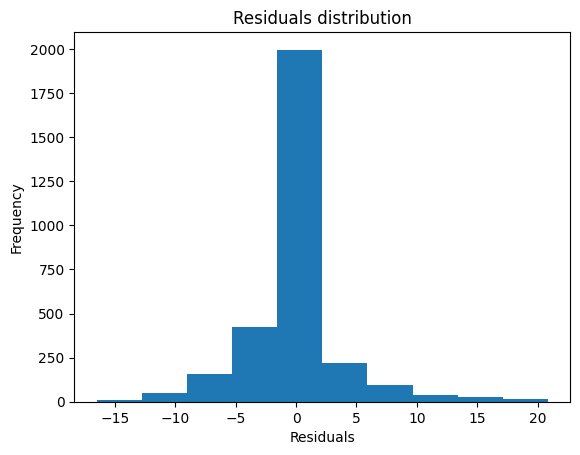

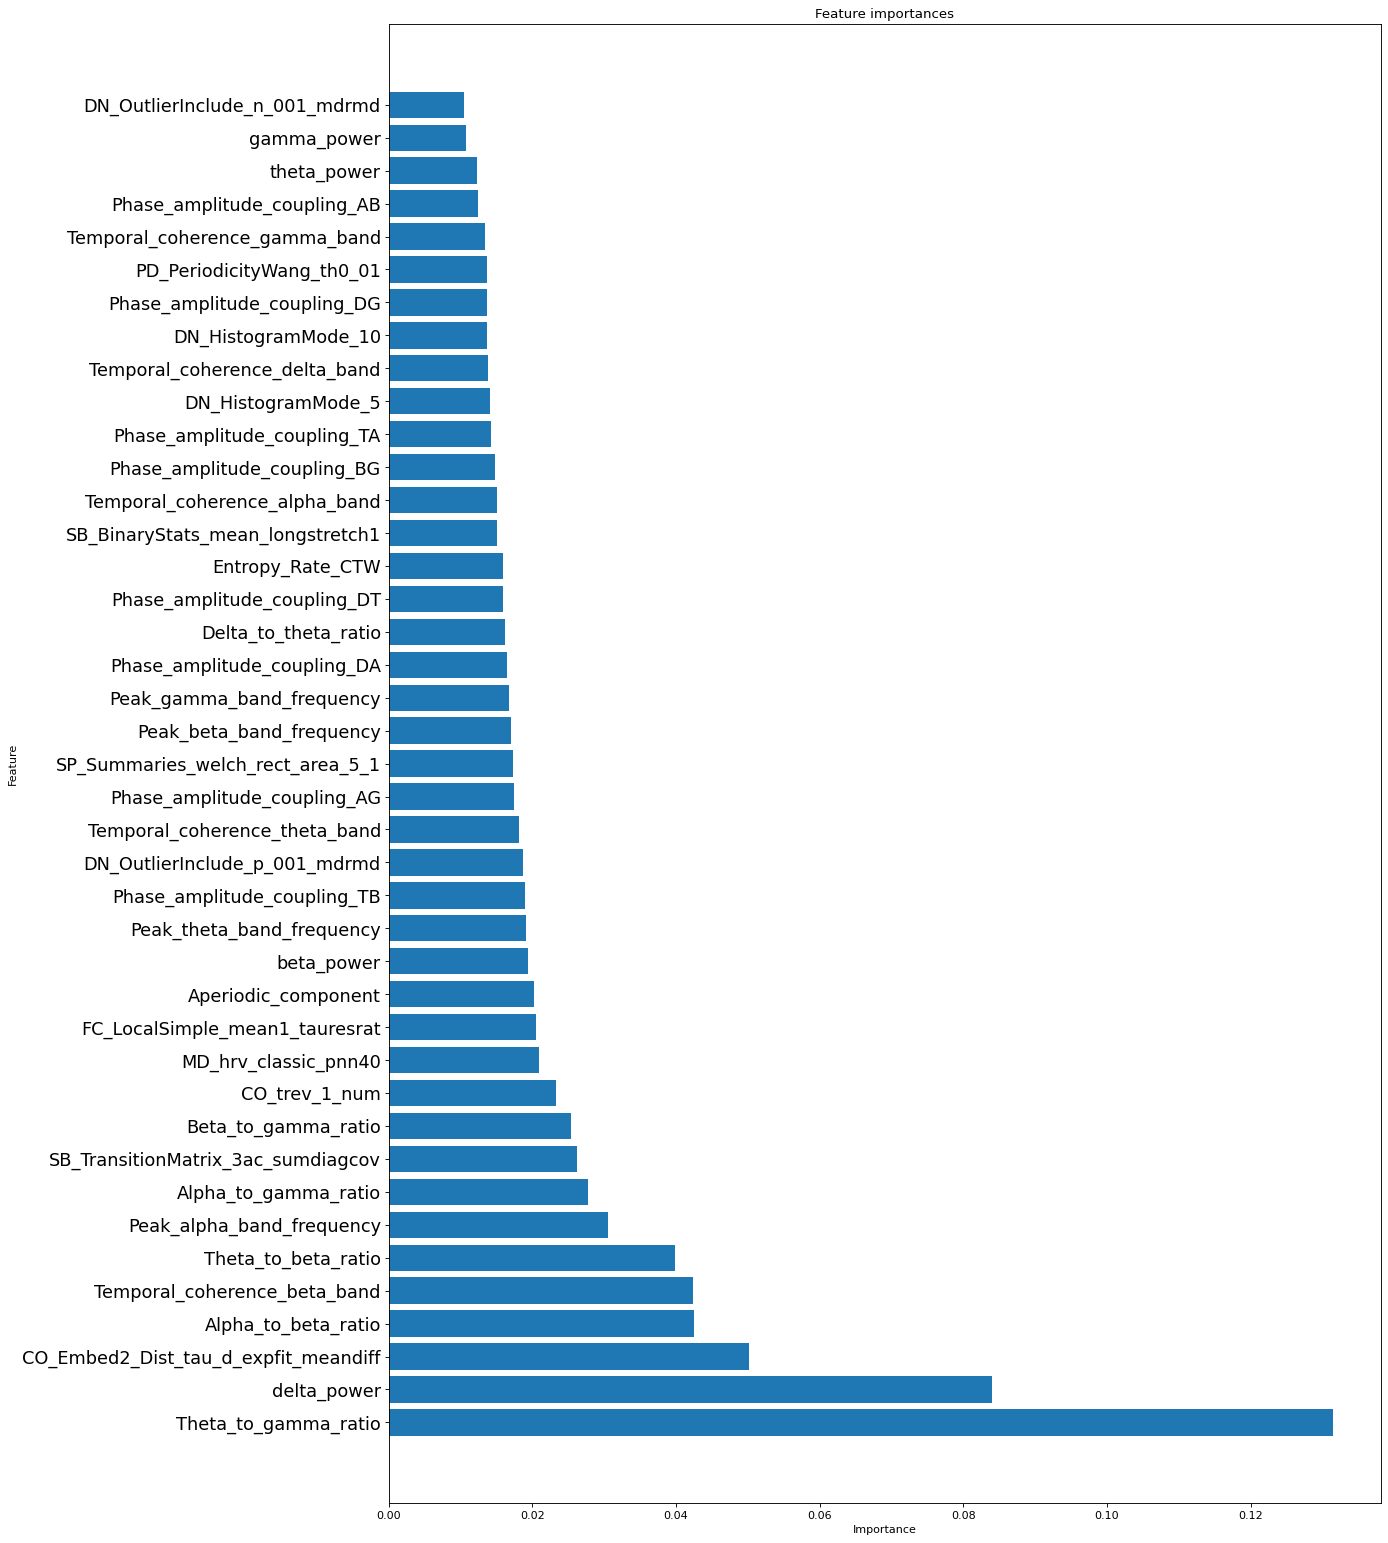

In [86]:

# Assess the model performance
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate the mean squared error
mse_after_selection = mean_squared_error(y_train_after_selection, predictions_after_selection)
# Calculate the root mean squared error
rmse_after_selection = np.sqrt(mse_after_selection)
# Calculate the R-squared score
r2_after_selection = r2_score(y_train_after_selection, predictions_after_selection)

print('Mean squared error: ', mse_after_selection)
print('Root mean squared error: ', rmse_after_selection)
print('R-squared score: ', r2_after_selection)

# Plot the predictions vs the actual values and reference line

plt.plot([y_train_after_selection.min(), y_train_after_selection.max()], [y_train_after_selection.min(), y_train_after_selection.max()], 'k--', lw=1)
plt.scatter(y_train_after_selection, predictions_after_selection)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted time to sleep onset')
plt.show()

# Plot the residuals with a reference line at 0
residuals_after_selection = y_train_after_selection - predictions_after_selection
plt.scatter(y_train_after_selection, residuals_after_selection)
plt.plot([y_train_after_selection.min(), y_train_after_selection.max()], [0, 0], 'k--', lw=1)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Residuals')
plt.title('Actual vs Residuals')
plt.show()

# Plot the residuals distribution

plt.hist(residuals_after_selection)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals distribution')
plt.show()

# Plot the sorted feature importances in a long horizontal bar chart and increased font size

importances_after_selection = rf_regressor_after_selection.feature_importances_

# sort the feature importances in descending order

indices = np.argsort(importances_after_selection)[::-1]

# Rearrange the feature names so they match the sorted feature importances

names = [X_subset.columns[i] for i in indices]

fig, ax = plt.subplots(figsize=(16, 24), dpi=80)

ax.barh(range(X_subset.shape[1]), importances_after_selection[indices], align='center')
ax.set_yticks(range(X_subset.shape[1]))
ax.set_yticklabels(names, fontsize=16)

ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature importances')
plt.show()



In [87]:
# Calculate mean absolute error (MAE)
errors_after_selection = abs(y_train_after_selection - predictions_after_selection)

# Calculate mean absolute percentage error (MAPE)
mae_after_selection = np.mean(errors_after_selection)

# Calculate mean absolute percentage error (MAPE)

mape_after_selection = 100 * (errors_after_selection / y_train_after_selection)

# Calculate and display accuracy
accuracy_after_selection = 100 - np.mean(mape_after_selection)

print('Mean Absolute Error:', round(mae_after_selection, 2))
print('Accuracy:', round(accuracy_after_selection, 2), '%.')


Mean Absolute Error: 2.29
Accuracy: 57.61 %.


Mean Absolute Error: 1.43
Accuracy: 75.28 %.


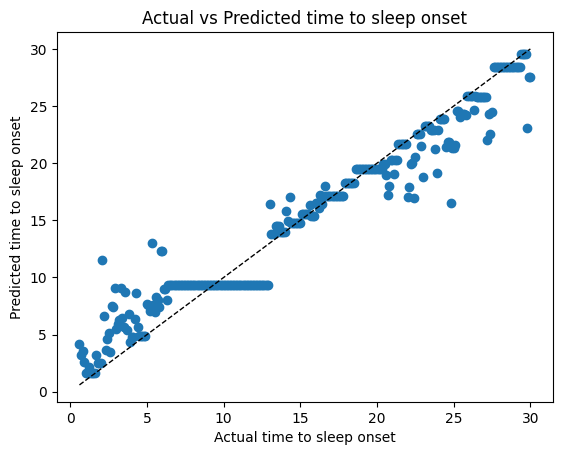

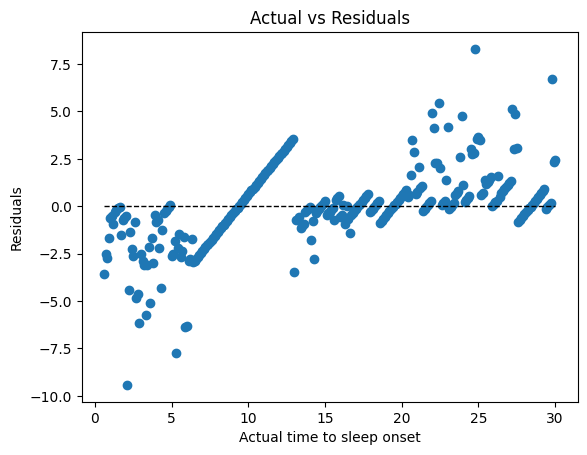

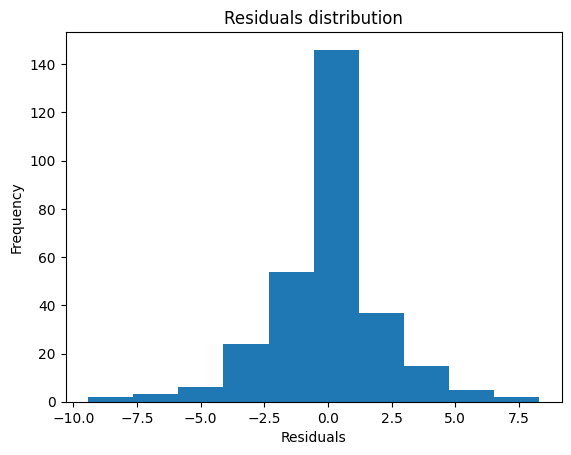

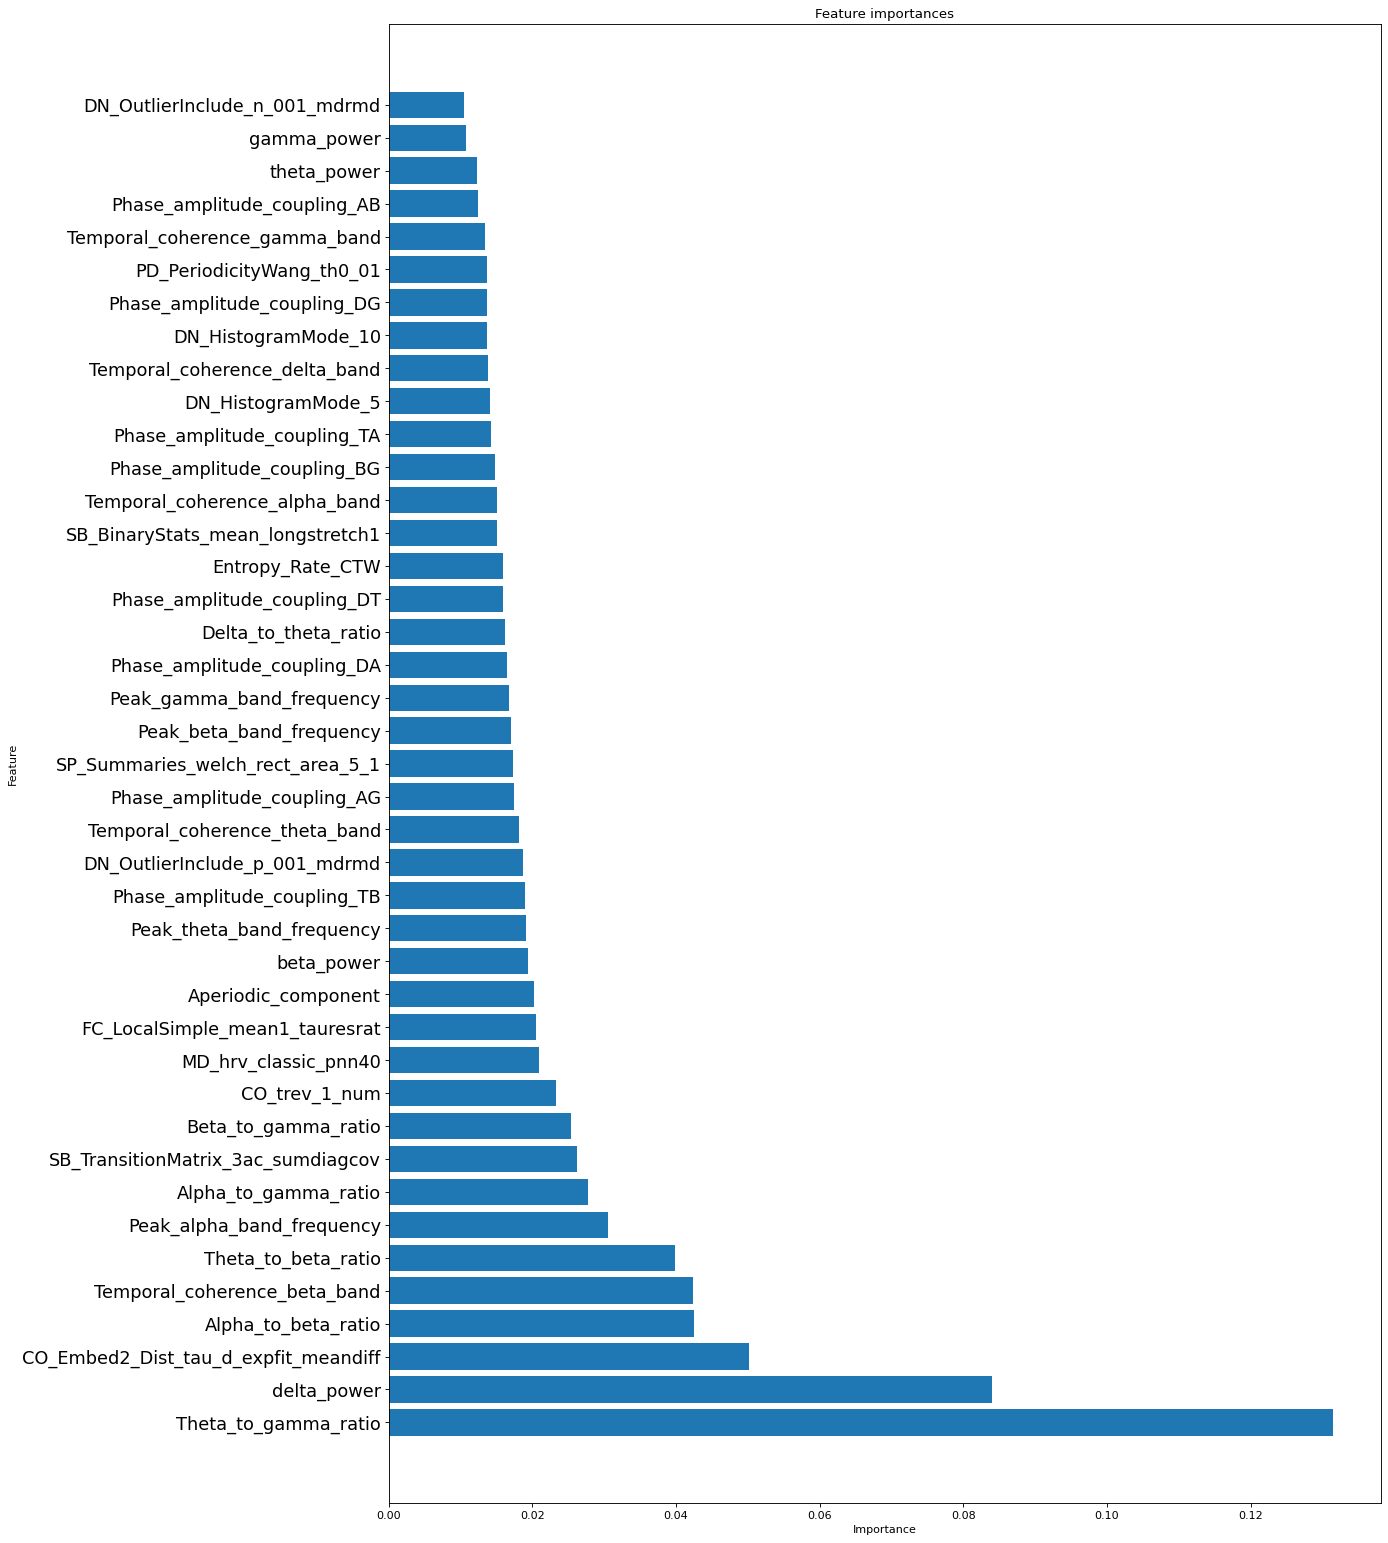

In [90]:
# Try this model on a single subject (sbj_id = 2)

# Load the data (mydata.Sbj_id == 2)

mydata_sbj2 = mydata[mydata.Sbj_ID == 2]

# Create a new subset of the data with only the selected features
X_subset_sbj2 = mydata_sbj2[top_k_features]

# Predict the sleep onset time for sbj_id = 2
predictions_sbj2 = rf_regressor_after_selection.predict(X_subset_sbj2)

# Calculate mean absolute error (MAE)

errors_sbj2 = abs(mydata_sbj2['Label'] - predictions_sbj2)

# Calculate mean absolute percentage error (MAPE)

mape_sbj2 = 100 * (errors_sbj2 / mydata_sbj2['Label'])

# Calculate and display accuracy

accuracy_sbj2 = 100 - np.mean(mape_sbj2)

print('Mean Absolute Error:', round(np.mean(errors_sbj2), 2))

print('Accuracy:', round(accuracy_sbj2, 2), '%.')

# Plot the predictions vs the actual values and reference line



plt.plot([mydata_sbj2['Label'].min(), mydata_sbj2['Label'].max()], [mydata_sbj2['Label'].min(), mydata_sbj2['Label'].max()], 'k--', lw=1)
plt.scatter(mydata_sbj2['Label'], predictions_sbj2)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted time to sleep onset')
plt.show()

# Plot the residuals with a reference line at 0

residuals_sbj2 = mydata_sbj2['Label'] - predictions_sbj2
plt.scatter(mydata_sbj2['Label'], residuals_sbj2)
plt.plot([mydata_sbj2['Label'].min(), mydata_sbj2['Label'].max()], [0, 0], 'k--', lw=1)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Residuals')
plt.title('Actual vs Residuals')
plt.show()

# Plot the residuals distribution

plt.hist(residuals_sbj2)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals distribution')
plt.show()

# Plot the sorted feature importances in a long horizontal bar chart and increased font size

importances_sbj2 = rf_regressor_after_selection.feature_importances_

# sort the feature importances in descending order

indices = np.argsort(importances_sbj2)[::-1]

# Rearrange the feature names so they match the sorted feature importances

names = [X_subset_sbj2.columns[i] for i in indices]

fig, ax = plt.subplots(figsize=(16, 24), dpi=80)

ax.barh(range(X_subset_sbj2.shape[1]), importances_sbj2[indices], align='center')

ax.set_yticks(range(X_subset_sbj2.shape[1]))

ax.set_yticklabels(names, fontsize=16)

ax.set_xlabel('Importance')

ax.set_ylabel('Feature')

ax.set_title('Feature importances')

plt.show()




Mean Absolute Error: 1.04
Accuracy: 83.54 %.


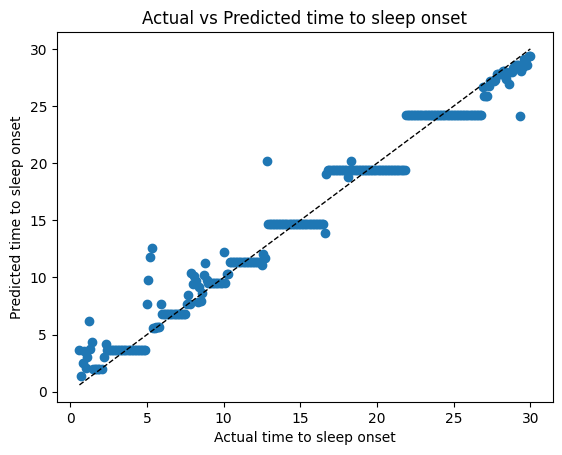

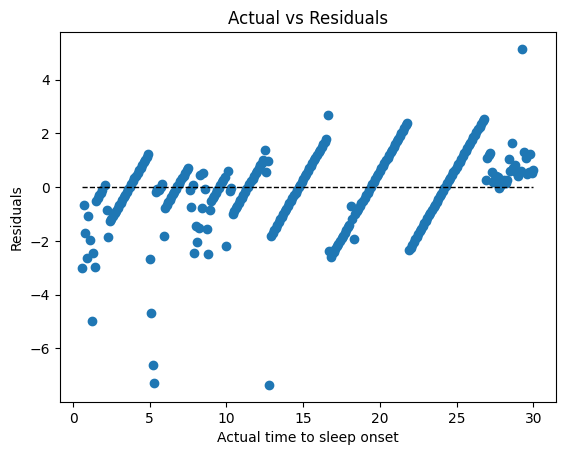

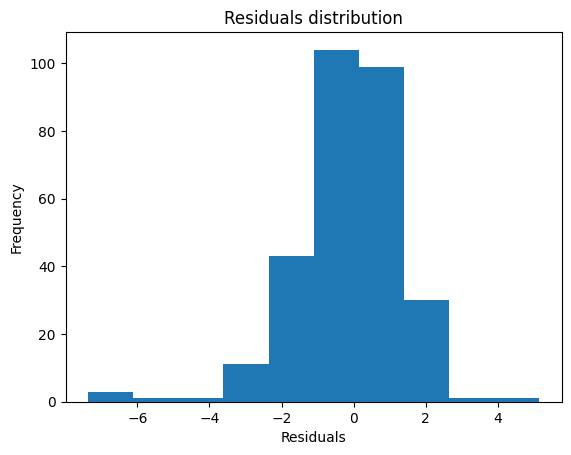

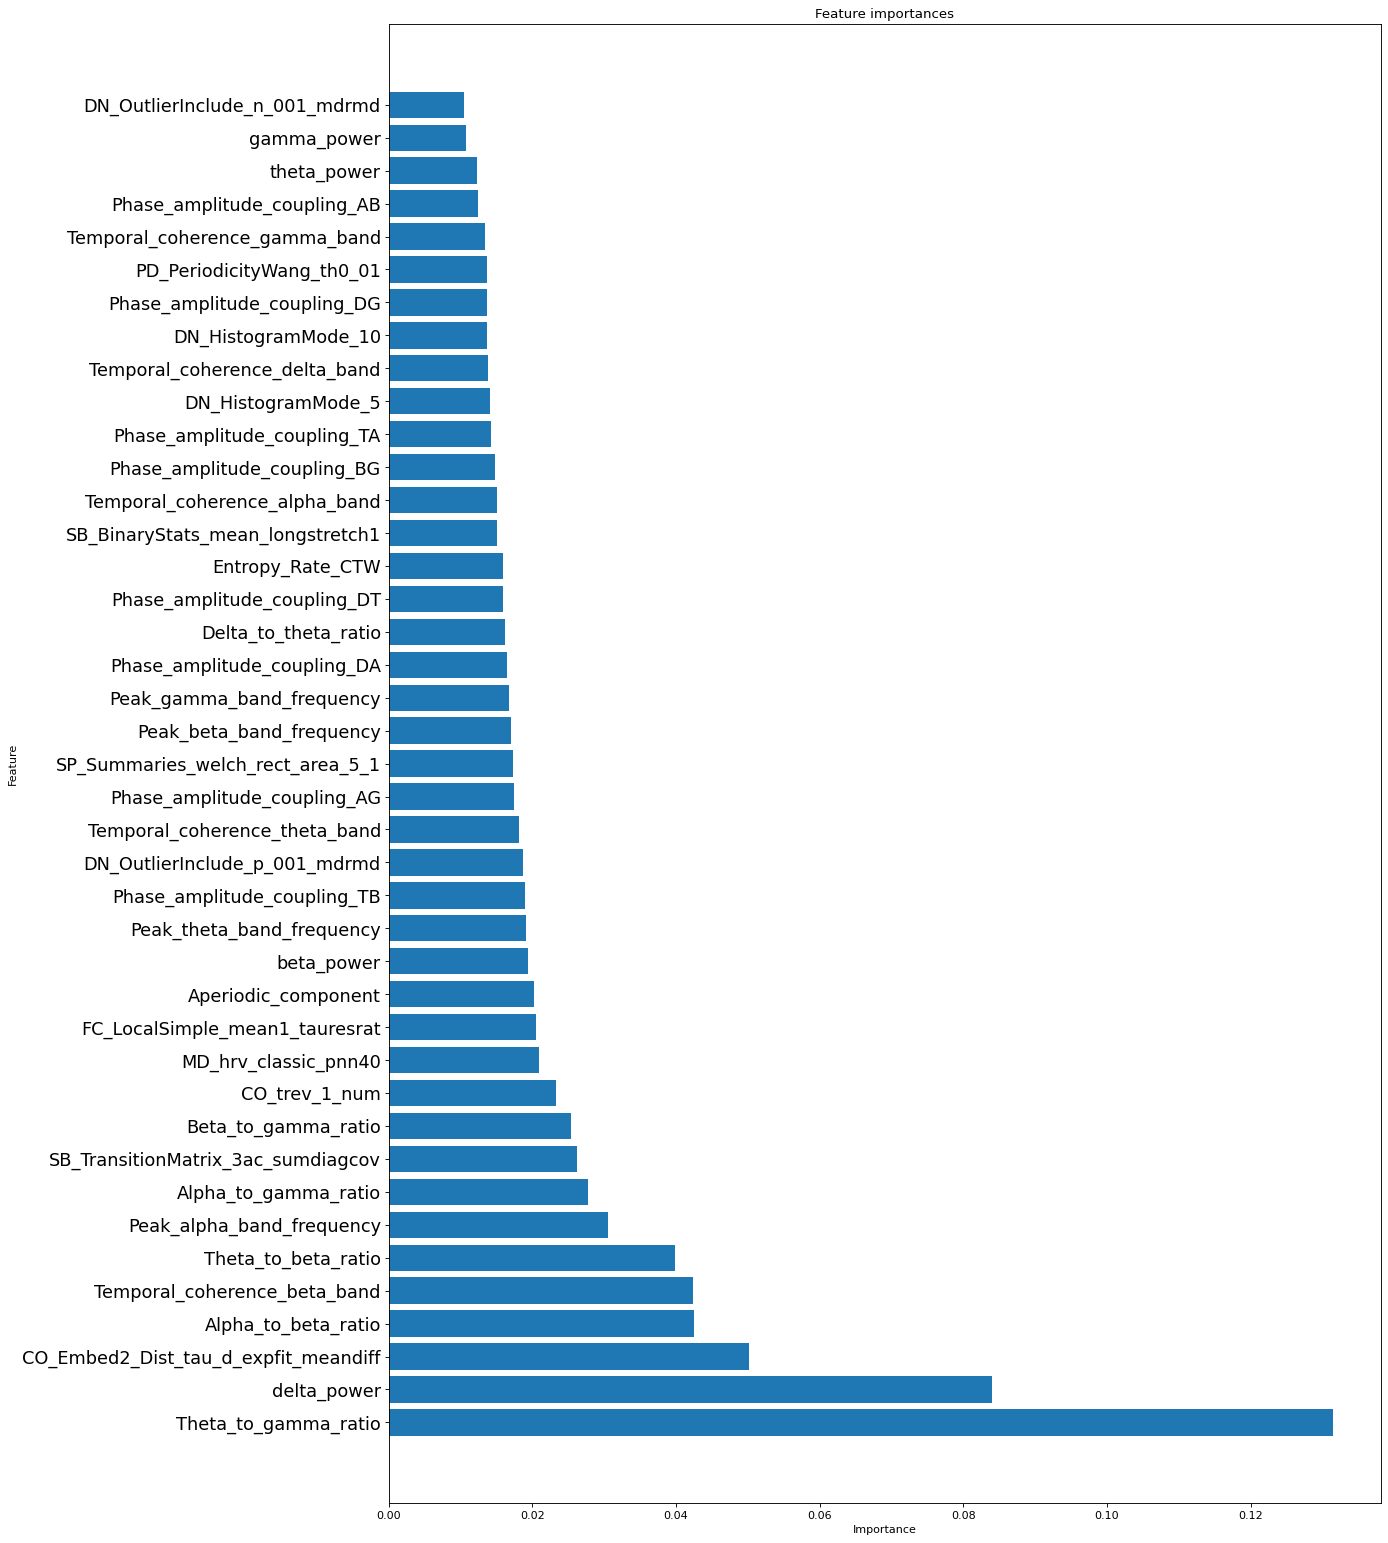

In [91]:
# Try this model on a single subject (sbj_id = 460)

# Load the data (mydata.Sbj_id == 460)

mydata_sbj460 = mydata[mydata.Sbj_ID == 460]

# Create a new subset of the data with only the selected features

X_subset_sbj460 = mydata_sbj460[top_k_features]

# Predict the sleep onset time for sbj_id = 460

predictions_sbj460 = rf_regressor_after_selection.predict(X_subset_sbj460)

# Calculate mean absolute error (MAE)

errors_sbj460 = abs(mydata_sbj460['Label'] - predictions_sbj460)

# Calculate mean absolute percentage error (MAPE)

mape_sbj460 = 100 * (errors_sbj460 / mydata_sbj460['Label'])

# Calculate and display accuracy

accuracy_sbj460 = 100 - np.mean(mape_sbj460)

print('Mean Absolute Error:', round(np.mean(errors_sbj460), 2))

print('Accuracy:', round(accuracy_sbj460, 2), '%.')

# Plot the predictions vs the actual values and reference line

plt.plot([mydata_sbj460['Label'].min(), mydata_sbj460['Label'].max()], [mydata_sbj460['Label'].min(), mydata_sbj460['Label'].max()], 'k--', lw=1)
plt.scatter(mydata_sbj460['Label'], predictions_sbj460)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted time to sleep onset')

plt.show()

# Plot the residuals with a reference line at 0

residuals_sbj460 = mydata_sbj460['Label'] - predictions_sbj460
plt.scatter(mydata_sbj460['Label'], residuals_sbj460)
plt.plot([mydata_sbj460['Label'].min(), mydata_sbj460['Label'].max()], [0, 0], 'k--', lw=1)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Residuals')
plt.title('Actual vs Residuals')
plt.show()

# Plot the residuals distribution

plt.hist(residuals_sbj460)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals distribution')
plt.show()

# Plot the sorted feature importances in a long horizontal bar chart and increased font size

importances_sbj460 = rf_regressor_after_selection.feature_importances_

# sort the feature importances in descending order

indices = np.argsort(importances_sbj460)[::-1]

# Rearrange the feature names so they match the sorted feature importances

names = [X_subset_sbj460.columns[i] for i in indices]

fig, ax = plt.subplots(figsize=(16, 24), dpi=80)

ax.barh(range(X_subset_sbj460.shape[1]), importances_sbj460[indices], align='center')

ax.set_yticks(range(X_subset_sbj460.shape[1]))

ax.set_yticklabels(names, fontsize=16)

ax.set_xlabel('Importance')

ax.set_ylabel('Feature')

ax.set_title('Feature importances')

plt.show()



In [88]:
# Display the comparrison of the performances before and after feature selection for mse, rmse, r2, mae and accuracy


print('Mean squared error: ', mse)
print('Mean squared error after feature selection: ', mse_after_selection)


print('Root mean squared error: ', rmse)
print('Root mean squared error after feature selection: ', rmse_after_selection)

print('R-squared score: ', r2)
print('R-squared score after feature selection: ', r2_after_selection)








Mean squared error:  15.028552120606617
Mean squared error after feature selection:  15.06326365145577
Root mean squared error:  3.876667656713252
Root mean squared error after feature selection:  3.88114205504717
R-squared score:  0.7799086399211629
R-squared score after feature selection:  0.7794002936763818


In [60]:
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Accuracy:', round(accuracy, 2), '%.')
print('Mean Absolute Error after feature selection:', round(mae_after_selection, 2))
print('Accuracy after feature selection:', round(accuracy_after_selection, 2), '%.')


Mean Absolute Error: 2.5
Accuracy: 47.85 %.
Mean Absolute Error after feature selection: 2.52
Accuracy after feature selection: 47.63 %.


In [94]:
# Create a function for trying the pretrained model on a single subject

def try_model_on_single_subject(sbj_id, pretrained_rf_model):

    new_data = mydata[mydata.Sbj_ID == sbj_id]

    X_subset = new_data[top_k_features]

    predictions = pretrained_rf_model.predict(X_subset)

    errors = abs(new_data['Label'] - predictions)

    mape = 100 * (errors / new_data['Label'])

    accuracy = 100 - np.mean(mape)

    print('Mean Absolute Error:', round(np.mean(errors), 2))

    print('Accuracy:', round(accuracy, 2), '%.')

    plt.plot([new_data['Label'].min(), new_data['Label'].max()], [new_data['Label'].min(), new_data['Label'].max()], 'k--', lw=1)

    plt.scatter(new_data['Label'], predictions)

    plt.xlabel('Actual time to sleep onset')

    plt.ylabel('Predicted time to sleep onset')

    plt.title('Actual vs Predicted time to sleep onset')

    plt.show()

    residuals = new_data['Label'] - predictions

    plt.scatter(new_data['Label'], residuals)

    plt.plot([new_data['Label'].min(), new_data['Label'].max()], [0, 0], 'k--', lw=1)

    plt.xlabel('Actual time to sleep onset')

    plt.ylabel('Residuals')

    plt.title('Actual vs Residuals')

    plt.show()

    plt.hist(residuals)

    plt.xlabel('Residuals')

    plt.ylabel('Frequency')

    plt.title('Residuals distribution')

    plt.show()


    return predictions, errors, mape, accuracy, residuals

    


Mean Absolute Error: 1.66
Accuracy: 70.95 %.


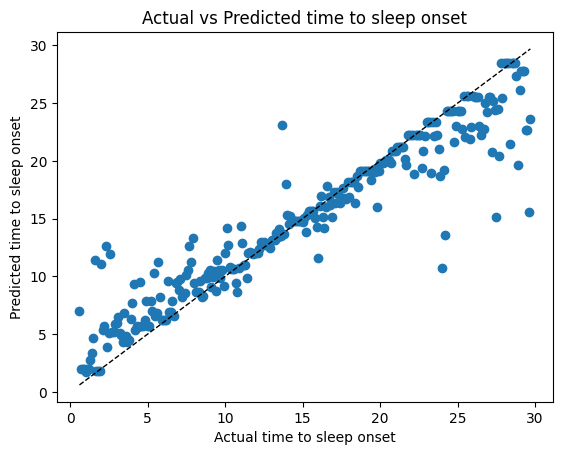

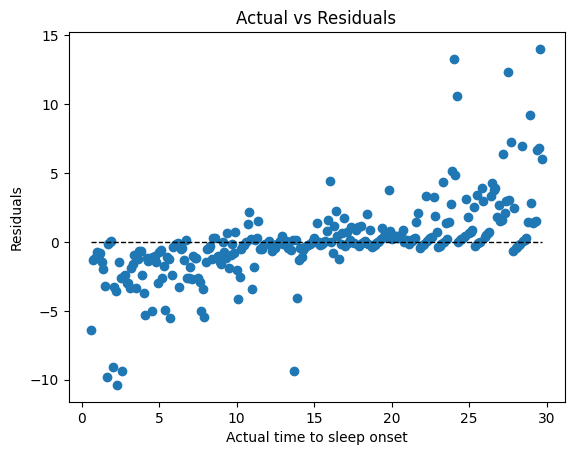

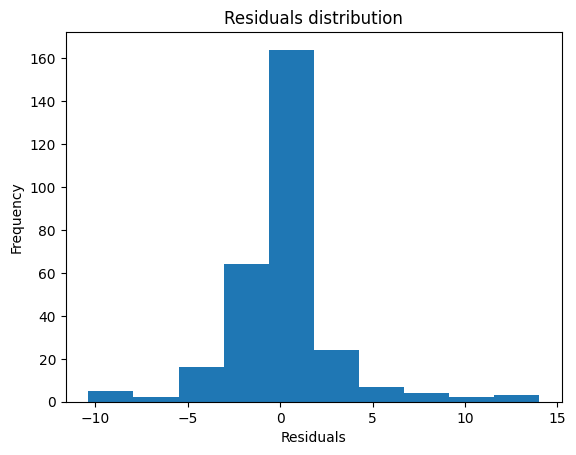

In [95]:
# Try the pretrained model on a single subject (sbj = 159)

predictions_sbj159, errors_sbj159, mape_sbj159, accuracy_sbj159, residuals_sbj159 = try_model_on_single_subject(159, rf_regressor_after_selection)

Subject ID:  2
Mean Absolute Error: 1.43
Accuracy: 75.28 %.


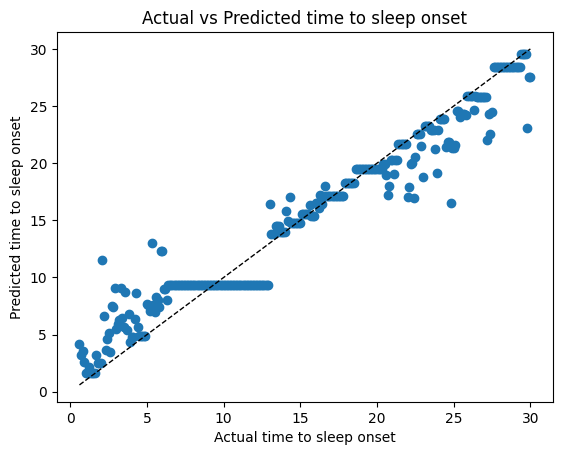

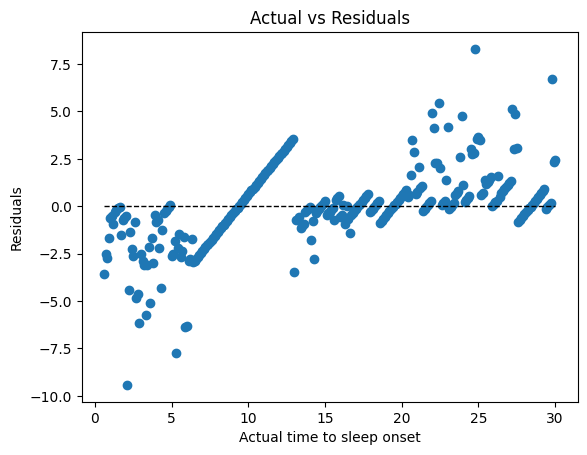

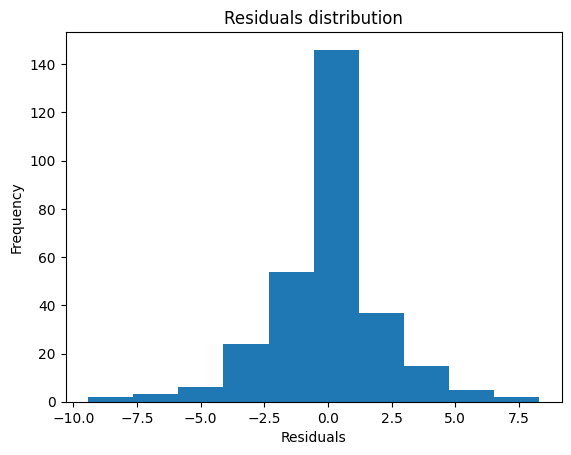

--------------------------------------
Subject ID:  35
Mean Absolute Error: 2.1
Accuracy: 85.61 %.


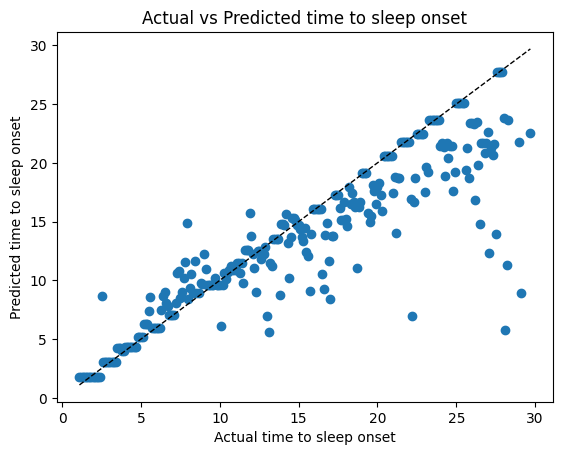

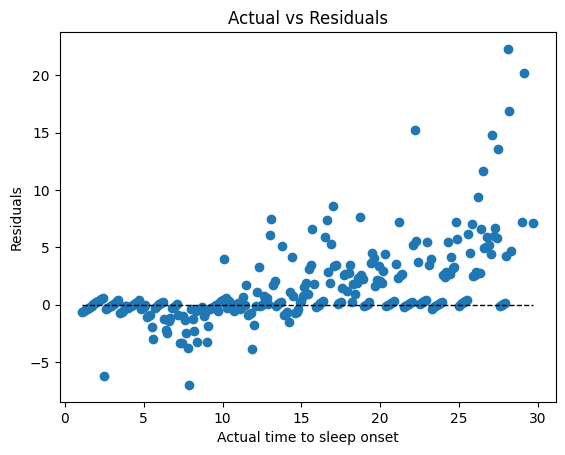

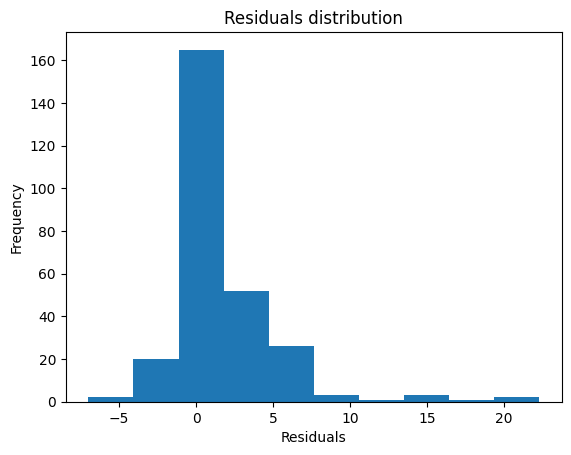

--------------------------------------
Subject ID:  56
Mean Absolute Error: 1.35
Accuracy: 73.21 %.


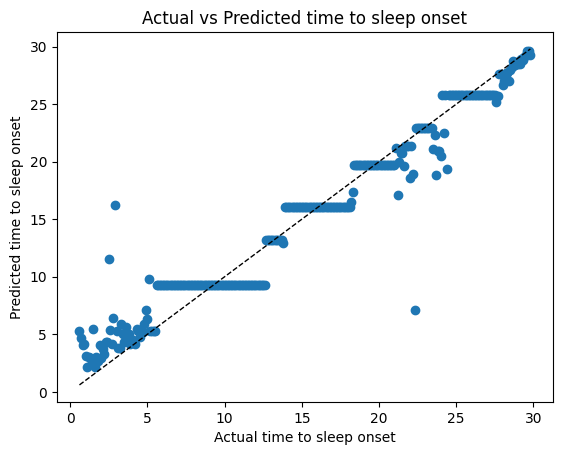

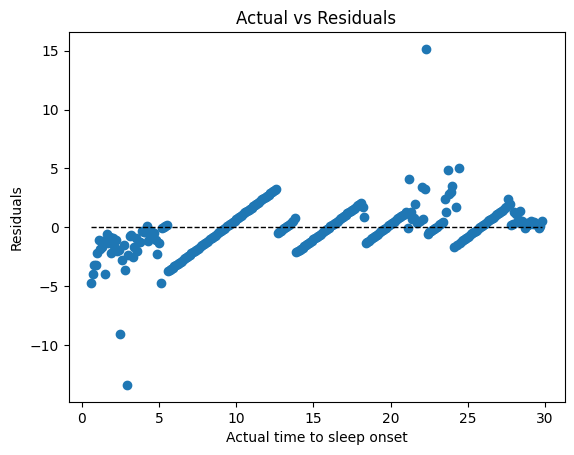

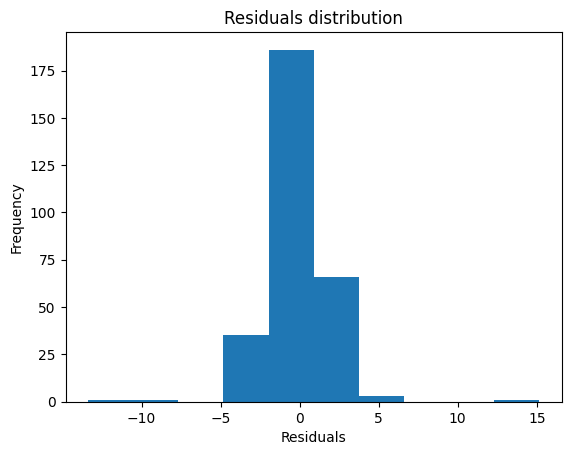

--------------------------------------
Subject ID:  77
Mean Absolute Error: 1.16
Accuracy: 83.02 %.


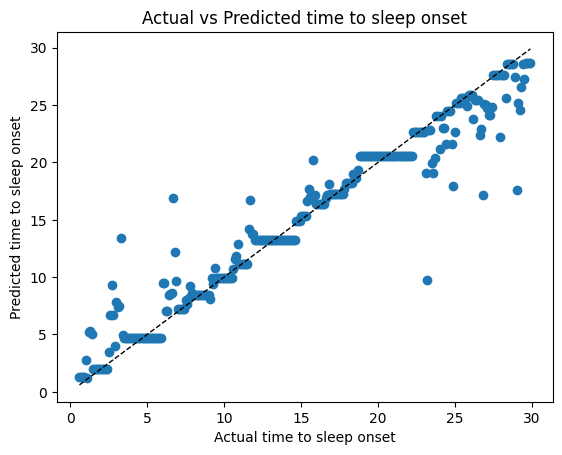

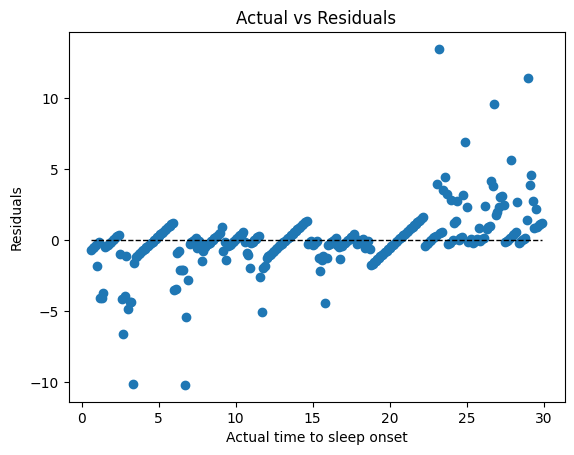

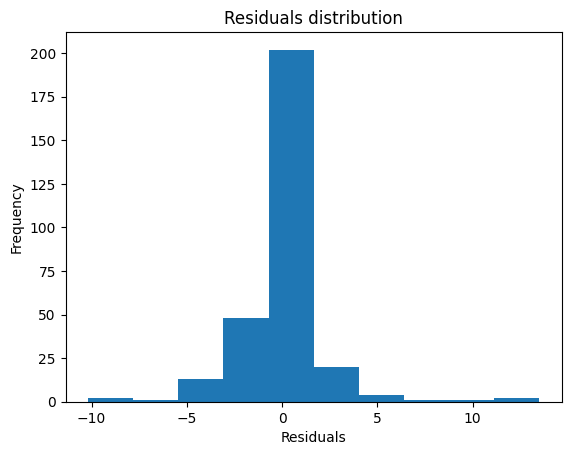

--------------------------------------
Subject ID:  159
Mean Absolute Error: 1.66
Accuracy: 70.95 %.


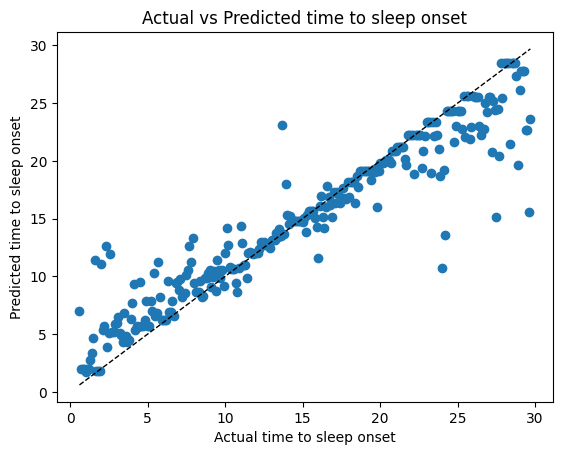

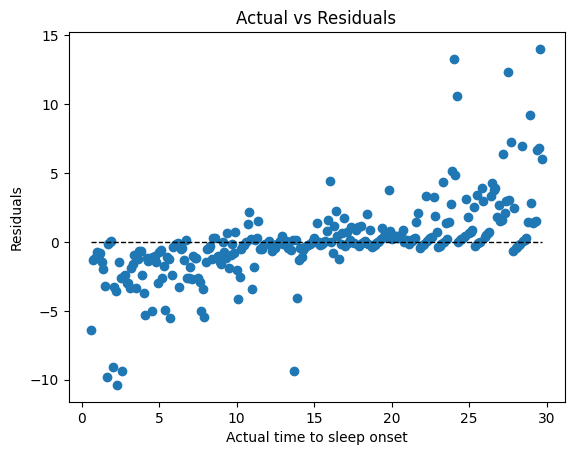

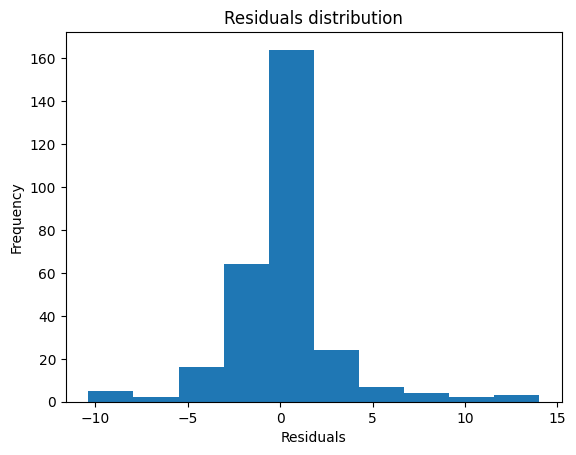

--------------------------------------
Subject ID:  284
Mean Absolute Error: 0.74
Accuracy: 85.63 %.


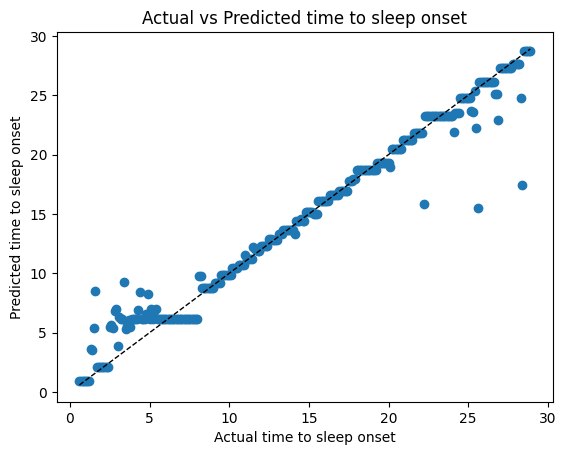

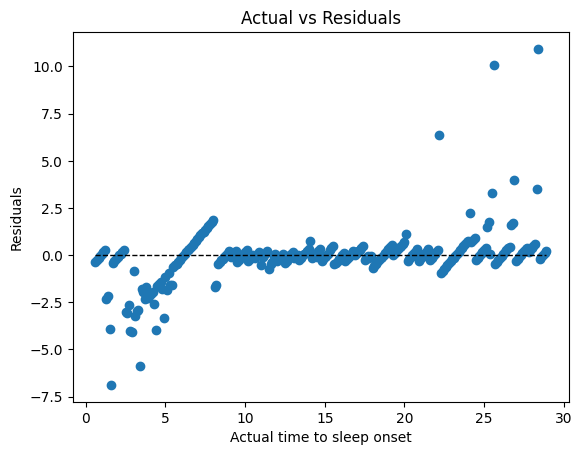

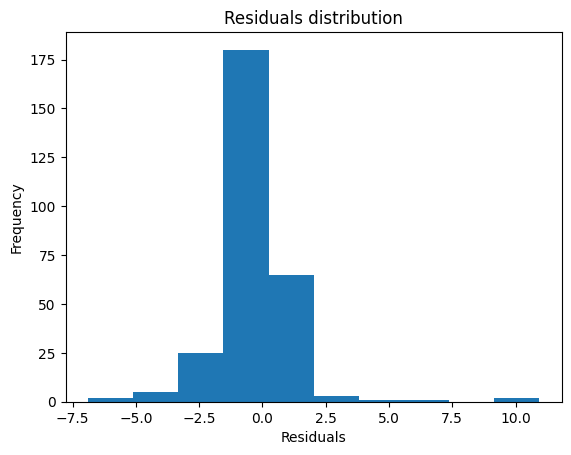

--------------------------------------
Subject ID:  288
Mean Absolute Error: 1.65
Accuracy: 77.59 %.


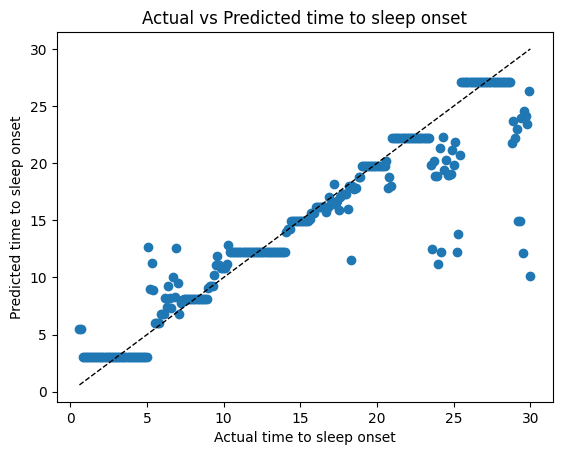

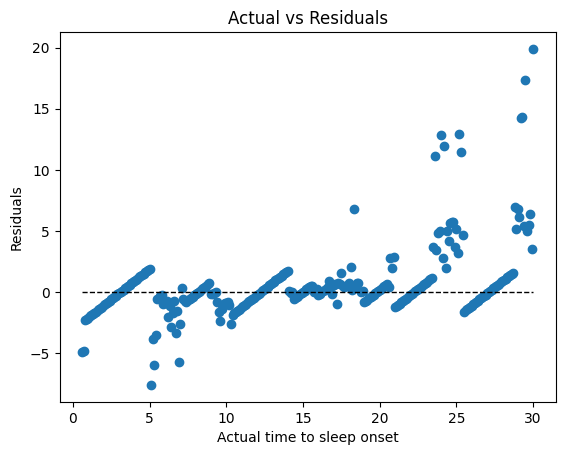

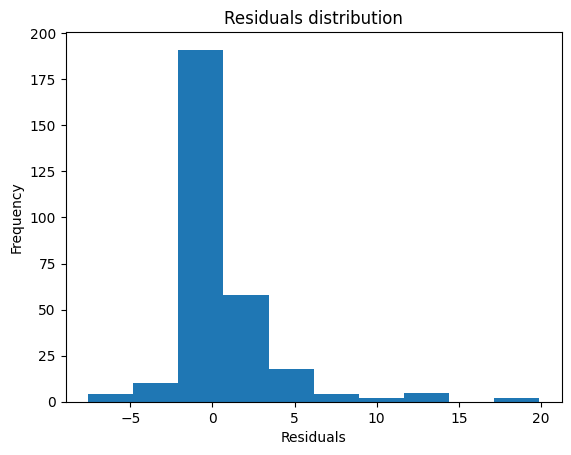

--------------------------------------
Subject ID:  344
Mean Absolute Error: 0.87
Accuracy: 83.36 %.


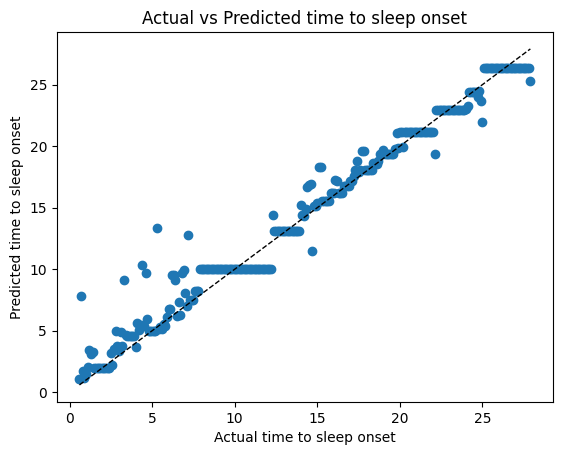

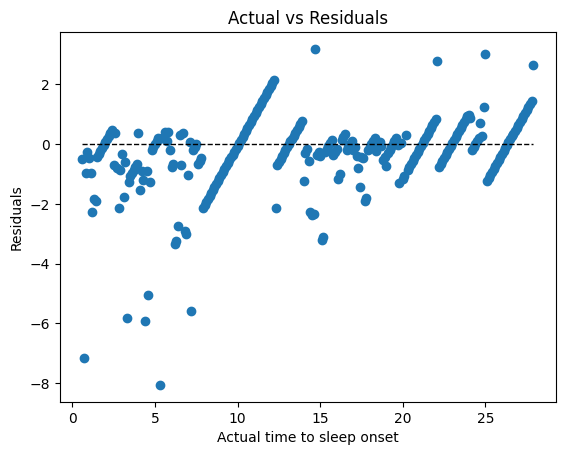

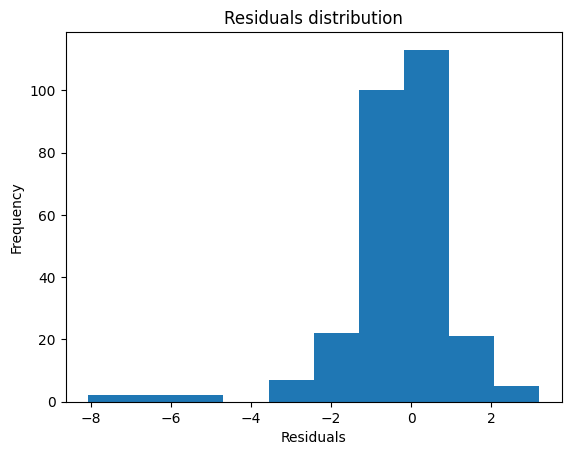

--------------------------------------
Subject ID:  382
Mean Absolute Error: 1.85
Accuracy: 63.69 %.


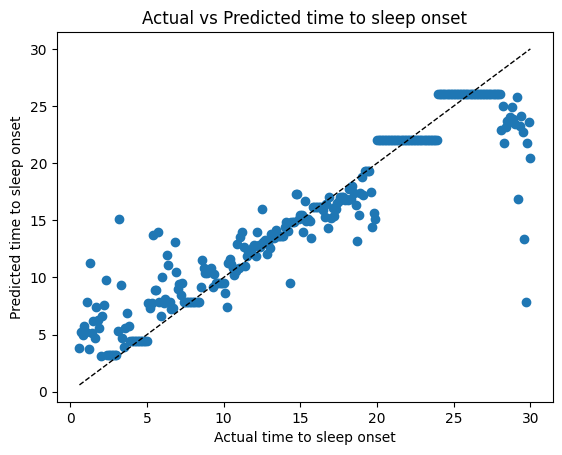

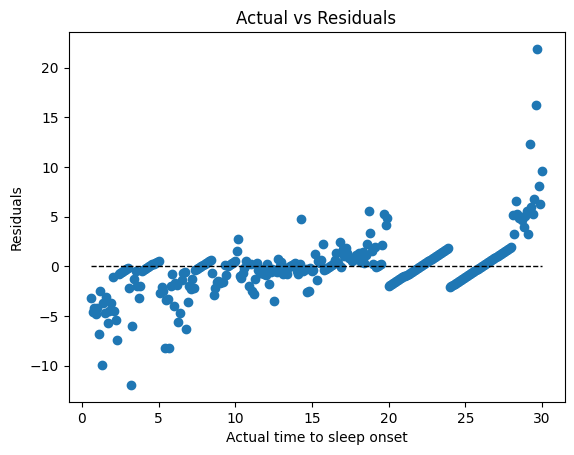

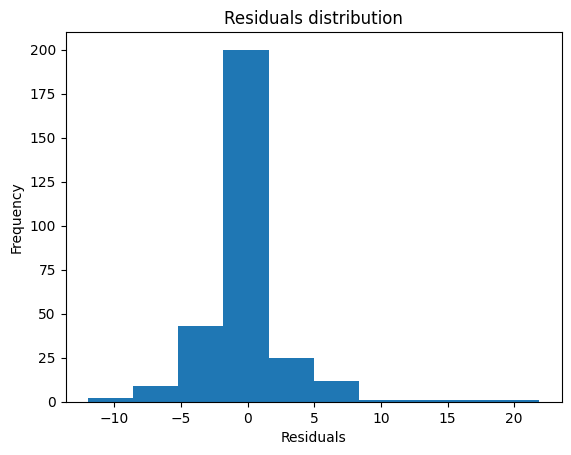

--------------------------------------
Subject ID:  384
Mean Absolute Error: 1.66
Accuracy: 68.33 %.


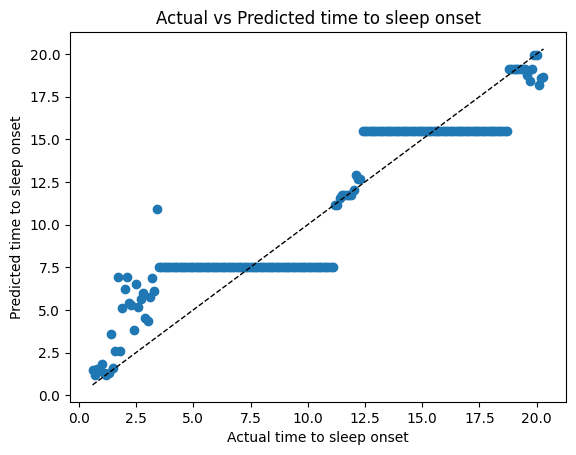

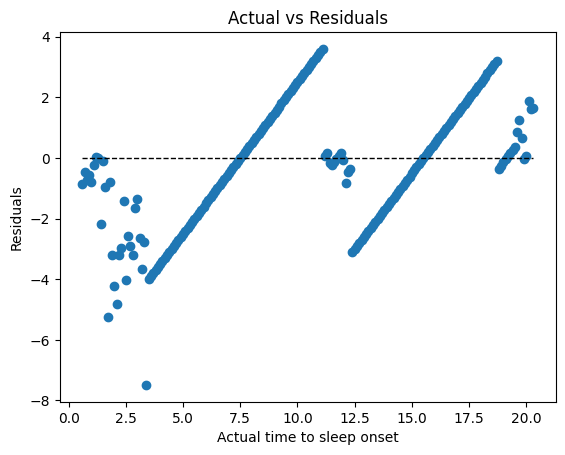

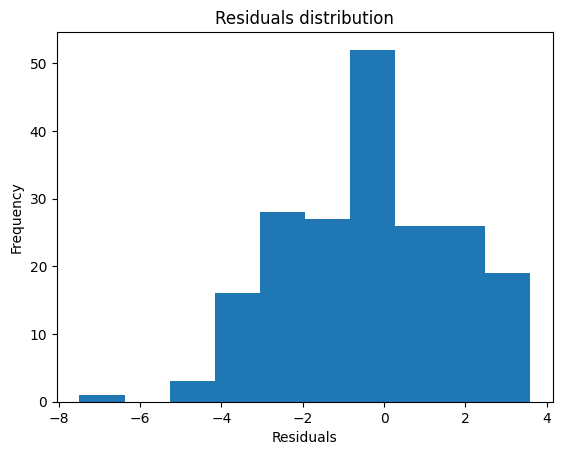

--------------------------------------
Subject ID:  416
Mean Absolute Error: 1.23
Accuracy: 76.65 %.


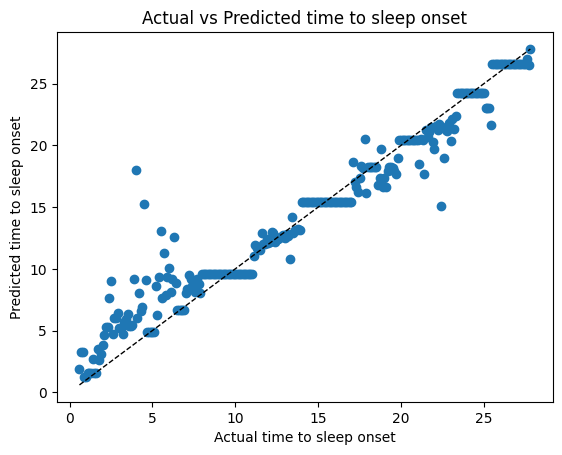

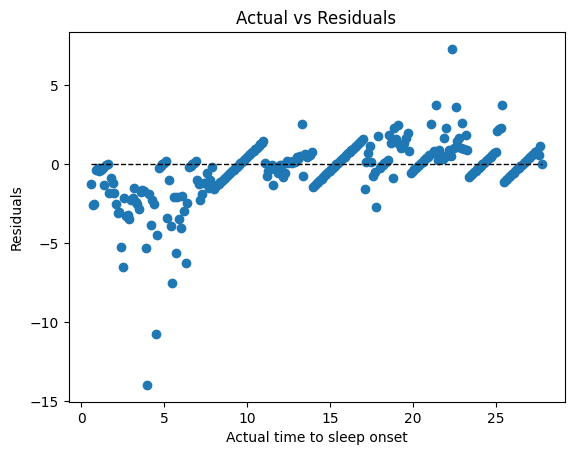

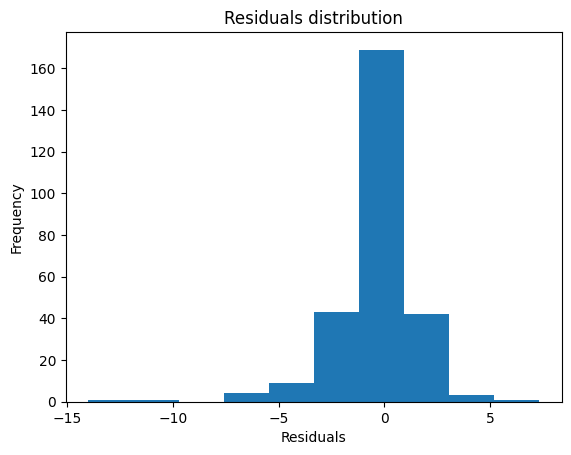

--------------------------------------
Subject ID:  419
Mean Absolute Error: 1.4
Accuracy: 67.77 %.


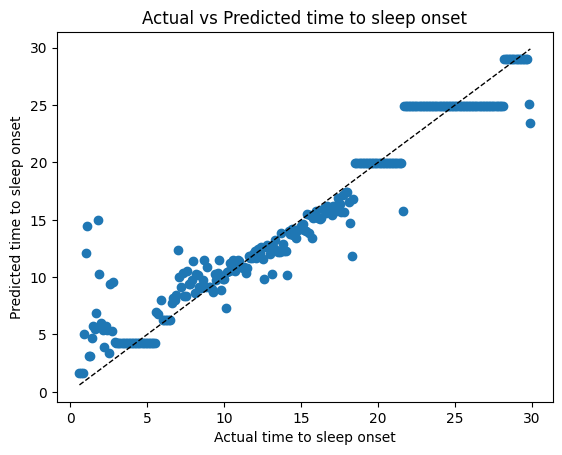

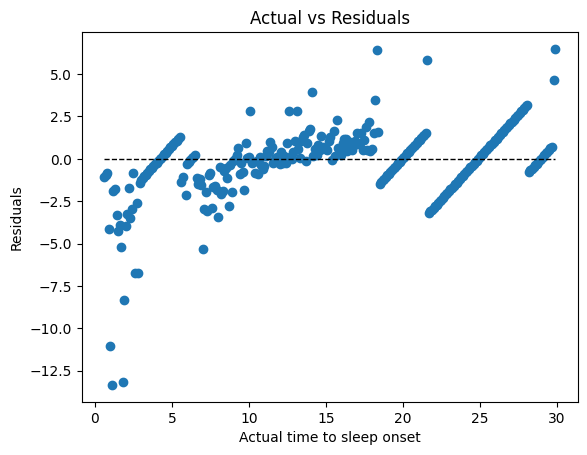

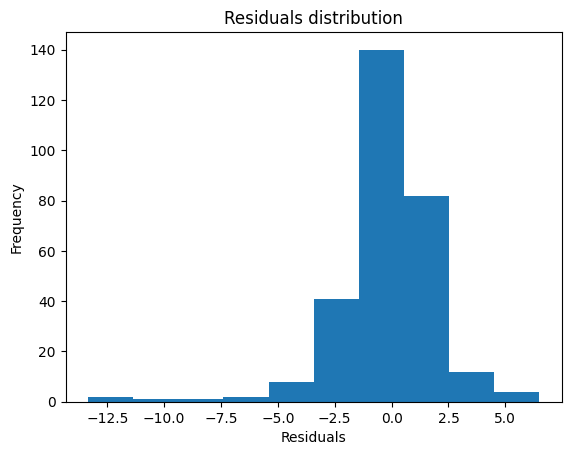

--------------------------------------
Subject ID:  458
Mean Absolute Error: 0.65
Accuracy: 85.19 %.


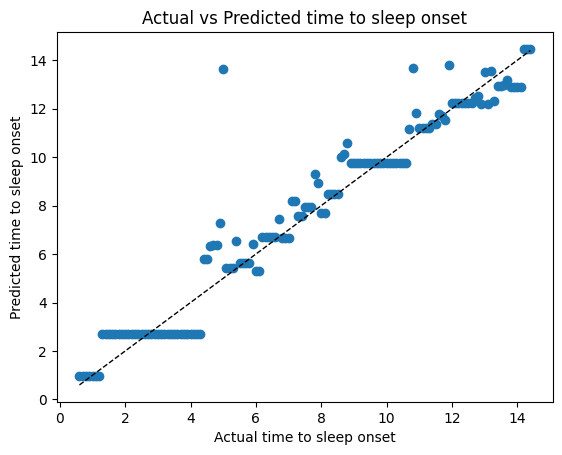

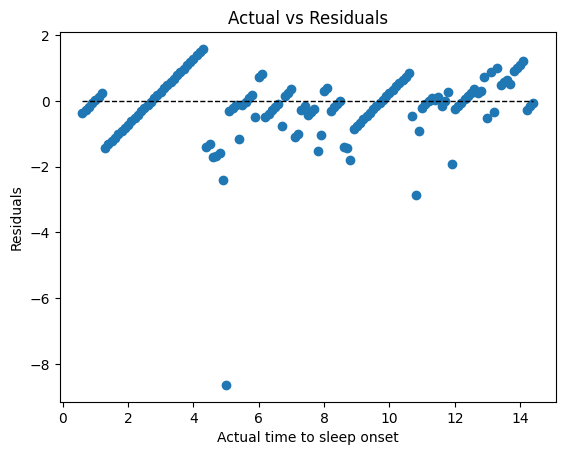

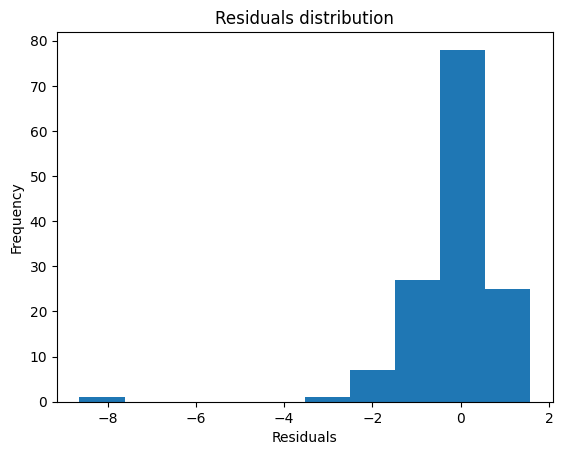

--------------------------------------
Subject ID:  460
Mean Absolute Error: 1.04
Accuracy: 83.54 %.


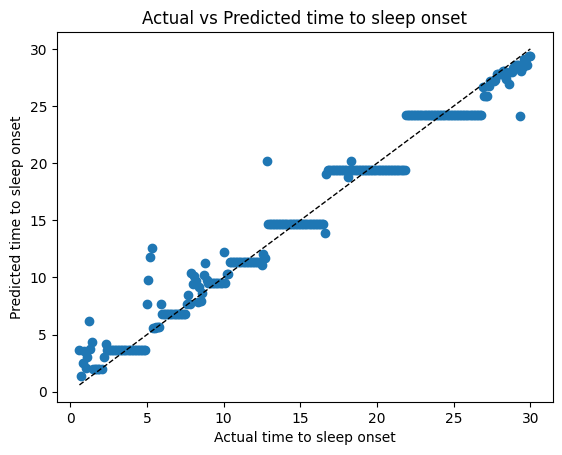

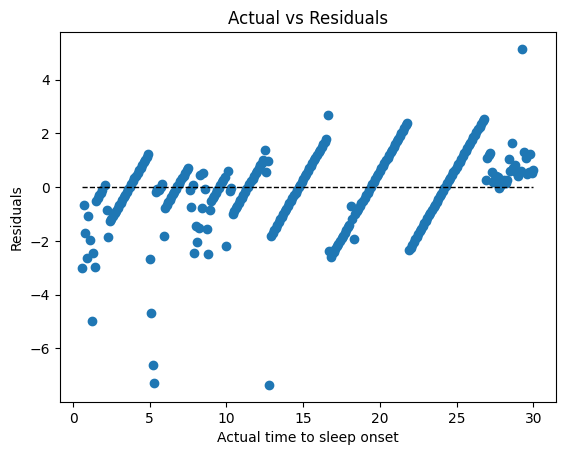

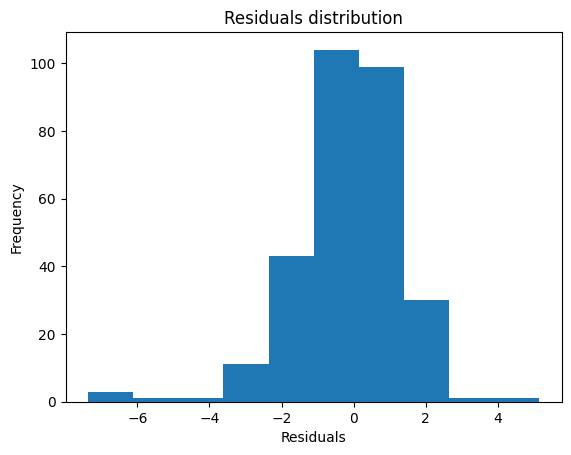

--------------------------------------


In [97]:
# for all subjects in the dataset (mydata), apply the pretrained model and save the results in a new dataframe

predictions_all_subjects = pd.DataFrame(columns=['Sbj_ID', 'Predictions', 'Errors', 'MAPE', 'Accuracy', 'Residuals'])

for sbj_id in mydata['Sbj_ID'].unique():

    print ('Subject ID: ', sbj_id)

    predictions, errors, mape, accuracy, residuals = try_model_on_single_subject(sbj_id, rf_regressor_after_selection)

    # Add the results to the dataframe not using append

    predictions_all_subjects.loc[len(predictions_all_subjects)] = [sbj_id, predictions, errors, mape, accuracy, residuals]






    
    print ('--------------------------------------')





In [110]:
from sklearn.utils import shuffle

# Train the model on the all but 2 subjects and test it on the remaining subject

# Split the data into training and testing sets
# get unique subject IDs

sbj_ids = mydata['Sbj_ID'].unique()

# select the first half of the subjects by selecting all but the last two subject ID
train_sbj_ids = sbj_ids[:-2]

# select the last subject ID
test_sbj_ids = sbj_ids[-2:]


# select the training data by selecting the rows with the subject IDs in train_sbj_ids
train_data = mydata[mydata['Sbj_ID'].isin(train_sbj_ids)]

# select the testing data by selecting the rows with the subject IDs in test_sbj_ids
test_data = mydata[mydata['Sbj_ID'].isin(test_sbj_ids)]

# select all the features (not the top_k_features, but all) and the label for training
X_train = train_data.drop(['Sbj_ID', 'Label'], axis=1)
y_train = train_data['Label']

# shuffle the training data
X_train, y_train = shuffle(X_train, y_train, random_state=42)


# select all the features and the label for testing
X_test = test_data.drop(['Sbj_ID', 'Label'], axis=1)
y_test = test_data['Label']

# train the model on the training data
rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_regressor.fit(X_train, y_train)




RandomForestRegressor(n_estimators=1000, random_state=42)

In [108]:
# Create a function for plotting the sorted feature importances in a long horizontal bar chart and increased font size

def plot_feature_importances(model, X):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    names = [X.columns[i] for i in indices]
    fig, ax = plt.subplots(figsize=(16, 24), dpi=80)
    ax.barh(range(X.shape[1]), importances[indices], align='center')
    ax.set_yticks(range(X.shape[1]))
    ax.set_yticklabels(names, fontsize=16)
    ax.set_xlabel('Importance')
    ax.set_ylabel('Feature')
    ax.set_title('Feature importances')
    plt.show()

    return importances, indices, names

# Create a funciton for evaluating the performance of the model on the test data

def evaluate_performance_test(model, X_test, y_test):

    predictions = model.predict(X_test)

    errors = abs(y_test - predictions)
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    print('Accuracy:', round(accuracy, 2), '%.')

    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
    plt.scatter(y_test, predictions)
    plt.xlabel('Actual time to sleep onset')
    plt.ylabel('Predicted time to sleep onset')
    plt.title('Actual vs Predicted time to sleep onset')
    plt.show()

    residuals = y_test - predictions
    plt.scatter(y_test, residuals)
    plt.plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=1)
    plt.xlabel('Actual time to sleep onset')
    plt.ylabel('Residuals')
    plt.title('Actual vs Residuals')
    plt.show()

    plt.hist(residuals)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Residuals distribution')
    plt.show()

    return predictions, errors, mape, accuracy, residuals


Mean Absolute Error: 4.84
Accuracy: -28.85 %.


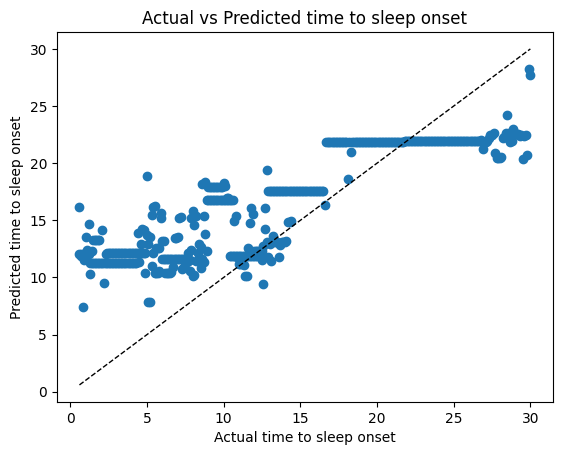

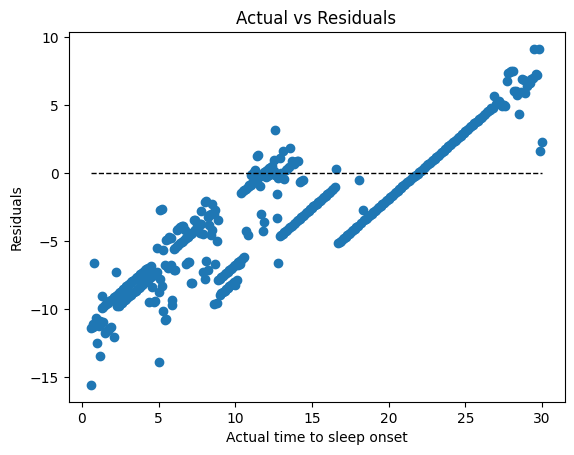

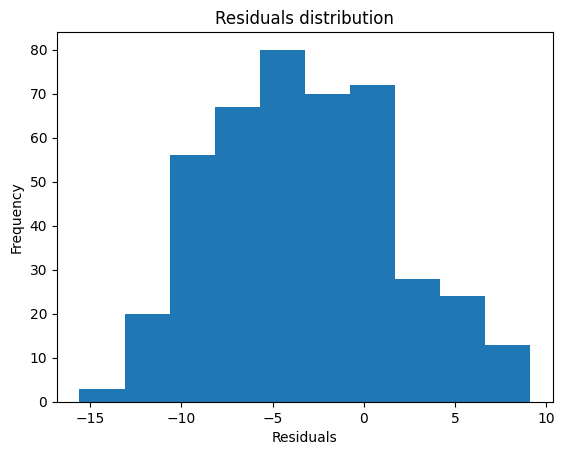

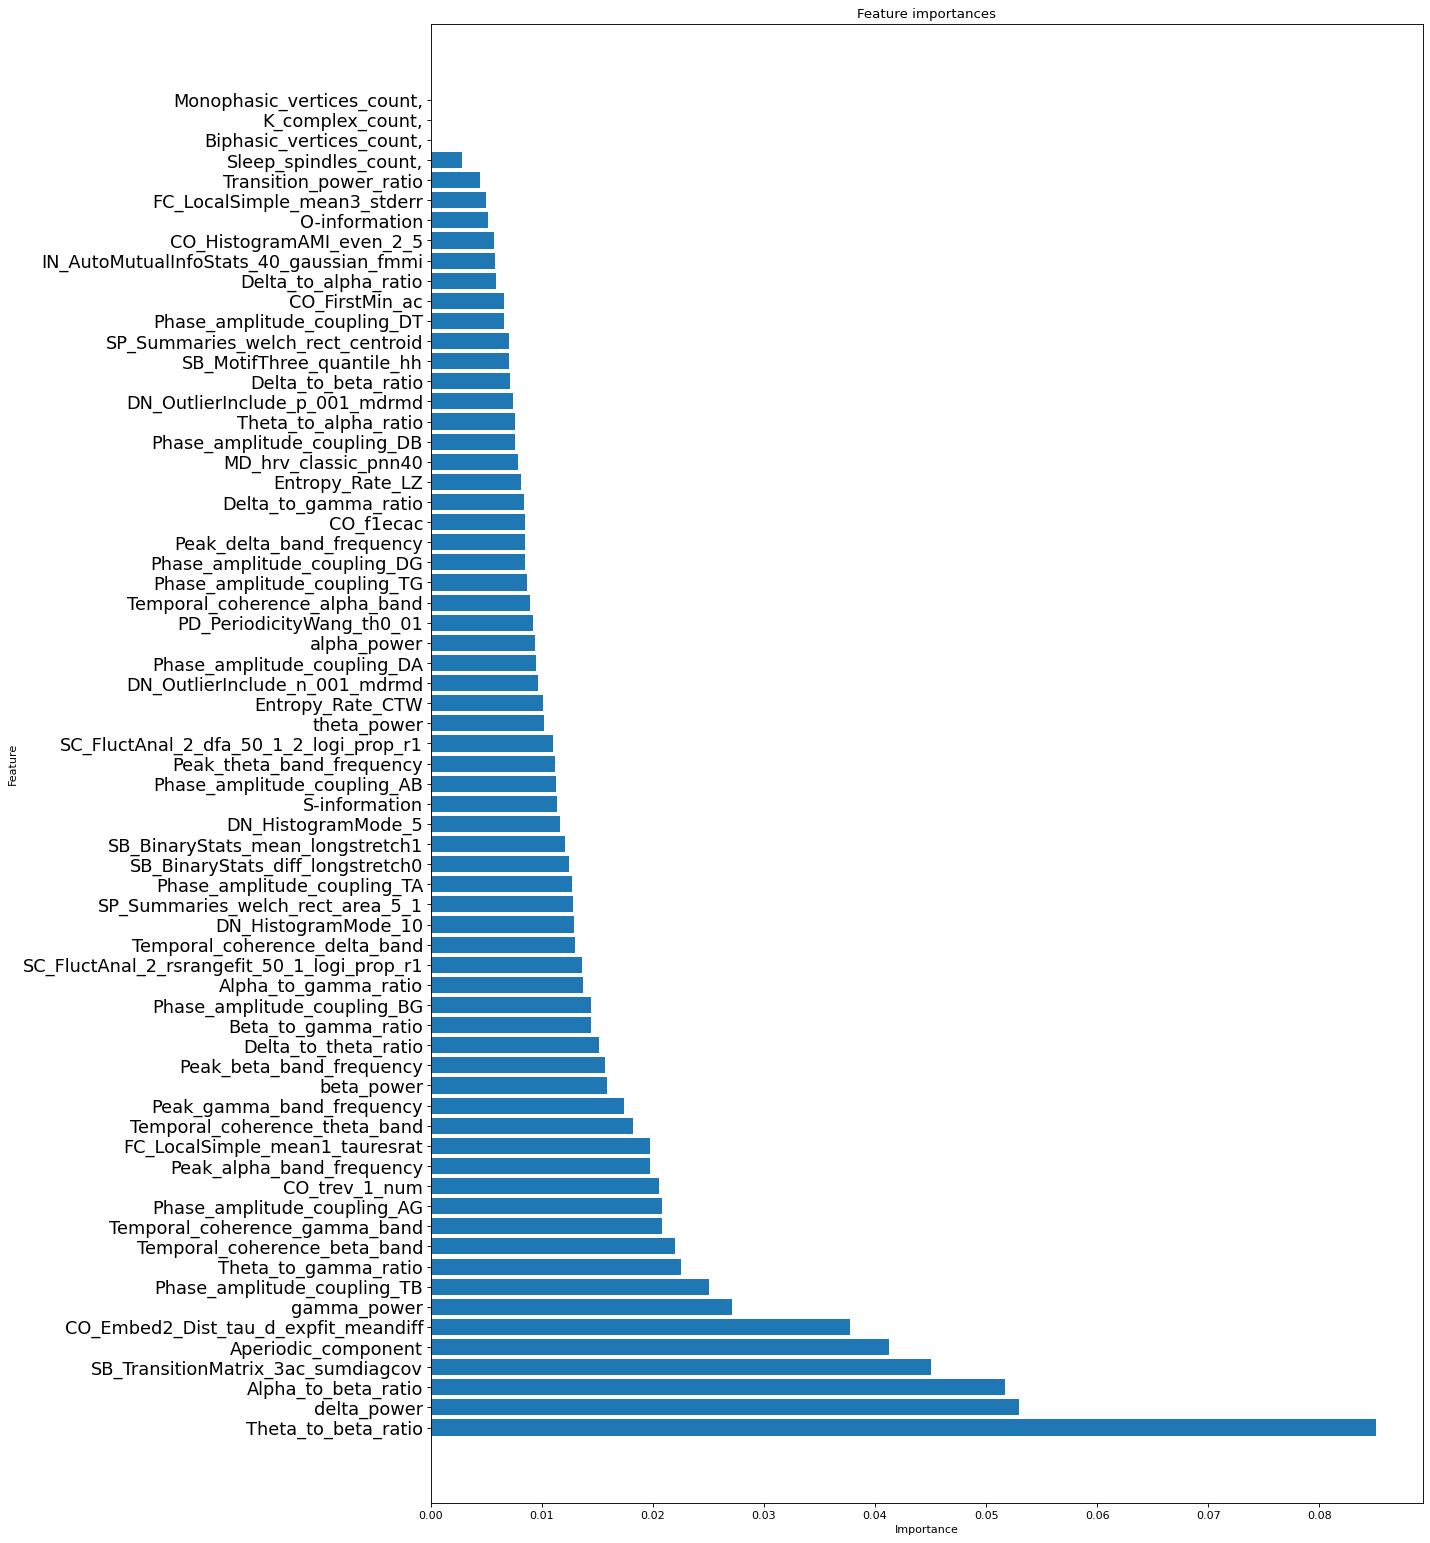

In [111]:
# test the model on the testing data and evaluate its performance

predictions, errors, mape, accuracy, residuals = evaluate_performance_test(rf_regressor, X_test, y_test)

# plot the feature importances

importances, indices, names = plot_feature_importances(rf_regressor, X_train)



Mean Absolute Error: 2.85
Accuracy: 27.34 %.


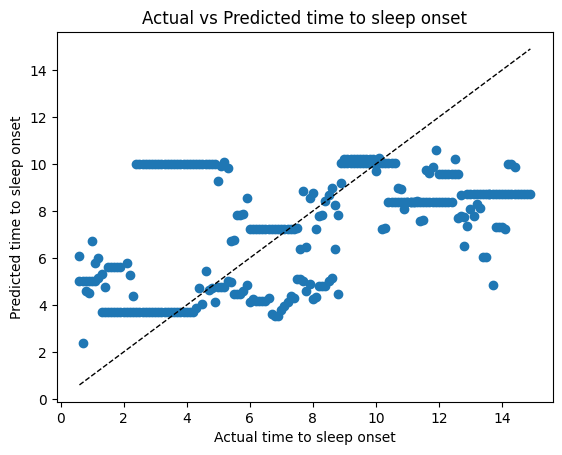

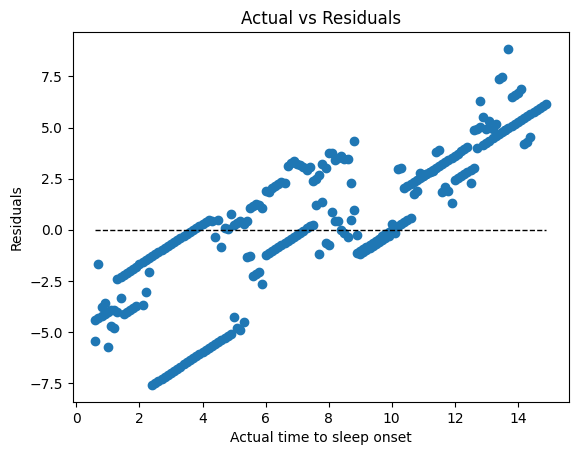

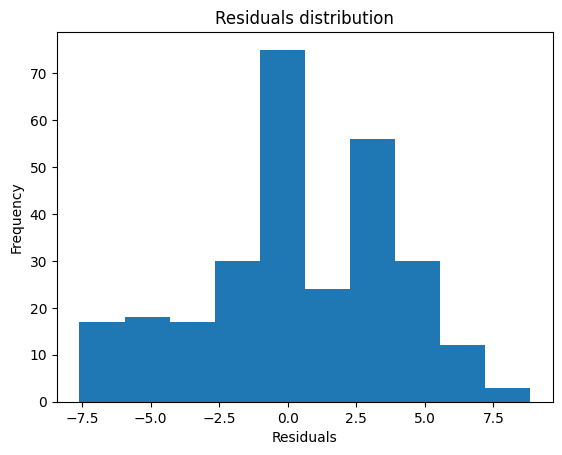

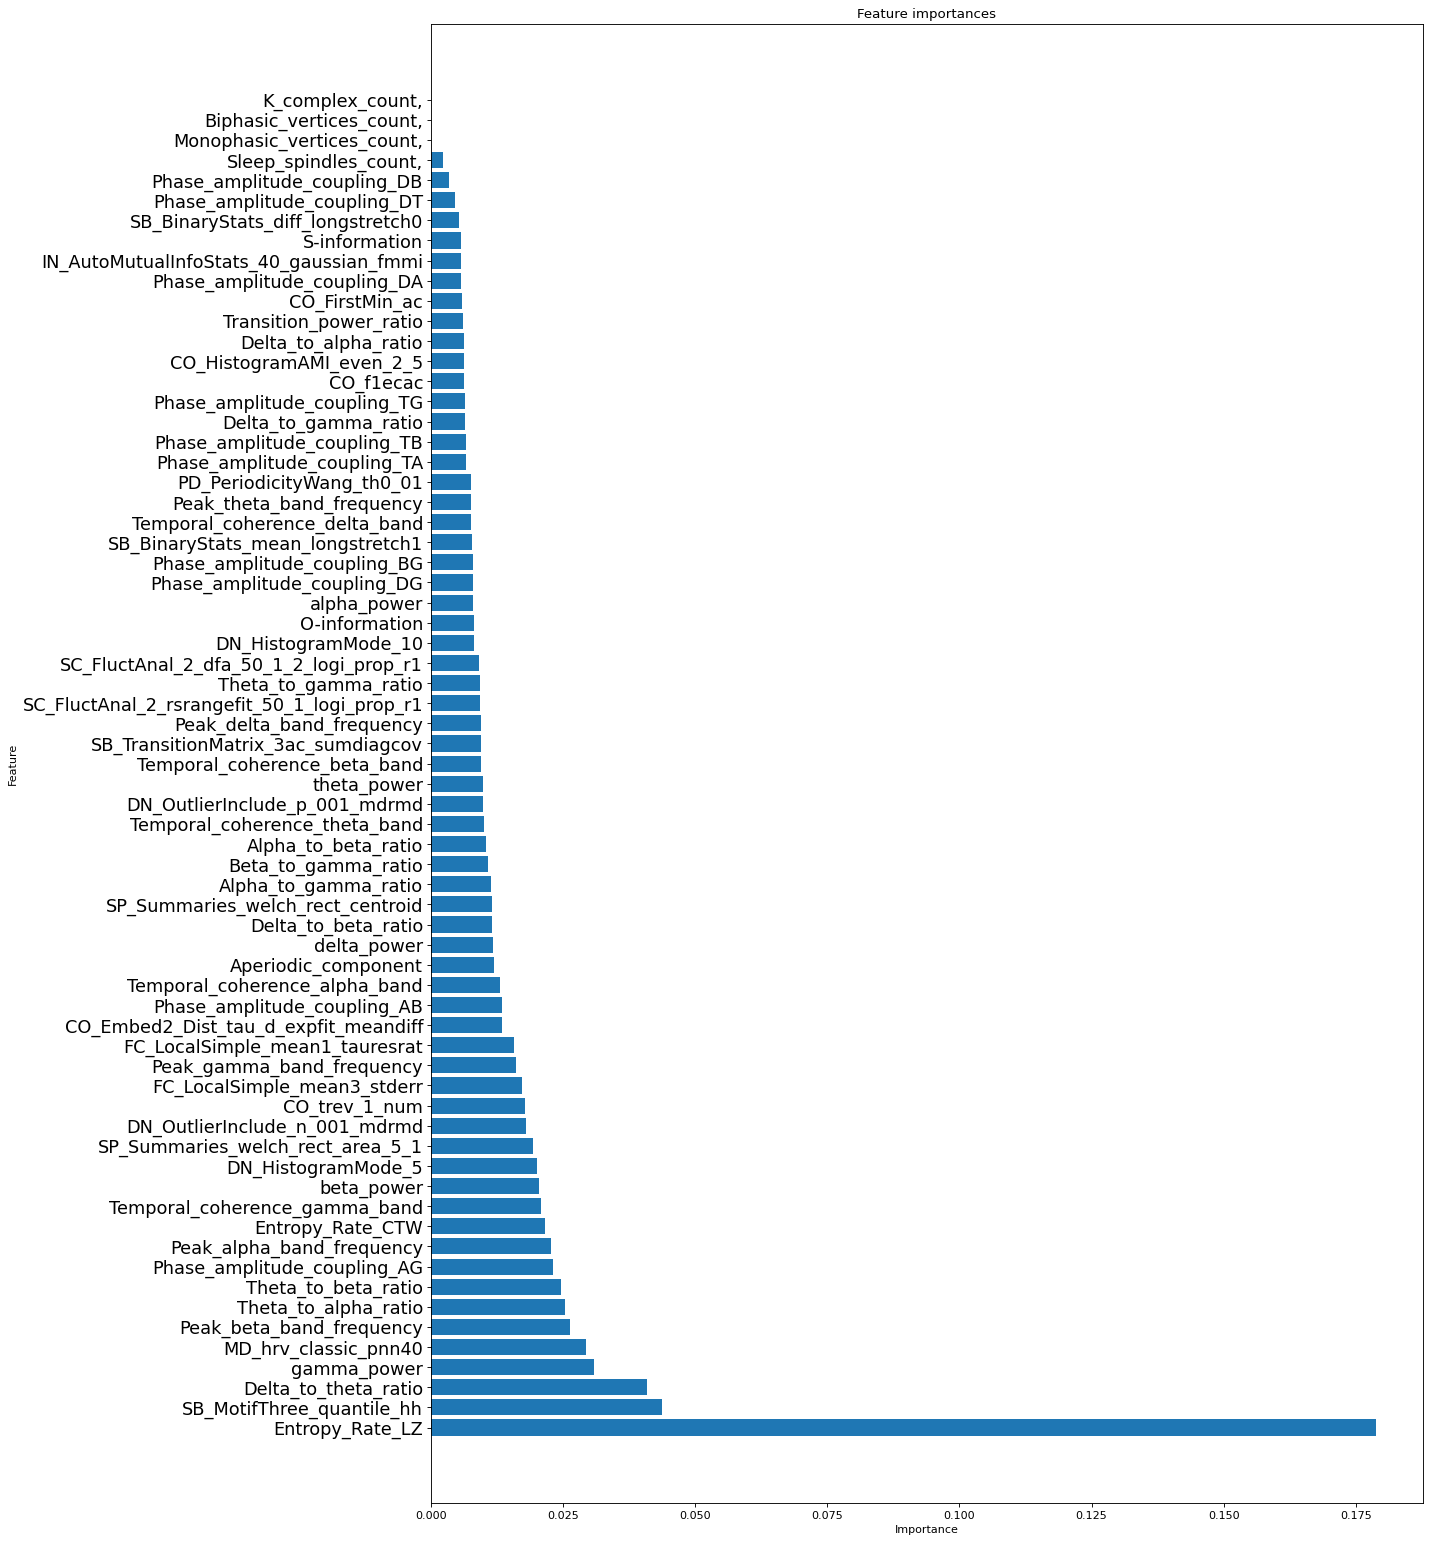

In [114]:
# Now, repeat the same process, but take only the samples with labels < 5 minutes

# select the training data by selecting the rows with the subject IDs in train_sbj_ids
train_data = mydata[mydata['Sbj_ID'].isin(train_sbj_ids)]

# select the testing data by selecting the rows with the subject IDs in test_sbj_ids
test_data = mydata[mydata['Sbj_ID'].isin(test_sbj_ids)]

# choose only the samples with labels < 10 minutes
train_data = train_data[train_data['Label'] < 15]
test_data = test_data[test_data['Label'] < 15]

# select all the features (not the top_k_features, but all) and the label for training
X_train = train_data.drop(['Sbj_ID', 'Label'], axis=1)
y_train = train_data['Label']

# shuffle the training data
X_train, y_train = shuffle(X_train, y_train, random_state=42)


# select all the features and the label for testing
X_test = test_data.drop(['Sbj_ID', 'Label'], axis=1)
y_test = test_data['Label']

# train the model on the training data
rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_regressor.fit(X_train, y_train)

# test the model on the testing data and evaluate its performance

predictions, errors, mape, accuracy, residuals = evaluate_performance_test(rf_regressor, X_test, y_test)

# plot the feature importances

importances, indices, names = plot_feature_importances(rf_regressor, X_train)


## Perform randomised search for hyperparameter tuning

In [61]:
from sklearn.model_selection import RandomizedSearchCV
# Perform hyperparameter tuning using RandomizedSearchCV on the selected features

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
# criterion
criterion = ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'] 

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
                'criterion': criterion,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_regressor = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_regressor_random = RandomizedSearchCV(estimator=rf_regressor, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_regressor_random.fit(X_train_after_selection, y_train_after_selection)





Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, criterion=squared_error, max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END bootstrap=True, criterion=squared_error, max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, criterion=squared_error, max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.9s
[CV] END bootstrap=False, criterion=poisson, max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  30.6s
[CV] END bootstrap=False, criterion=poisson, max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  33.8s
[CV] END bootstrap=True, criterion=absolute_error, max_depth=110, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=  46.3s
[CV] END bootstrap=True, criterion=absolute_error, max_depth=110, min_samples_leaf=4, mi

KeyboardInterrupt: 

In [ ]:
# Print the best parameters and score
print(rf_regressor_random.best_params_)
print(rf_regressor_random.best_score_)
print(rf_regressor_random.best_estimator_)
print(rf_regressor_random.best_index_)
print(rf_regressor_random.scorer_)
print(rf_regressor_random.n_splits_)
print(rf_regressor_random.refit_time_)



{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 100, 'criterion': 'absolute_error', 'bootstrap': True}
0.8777764861941734
RandomForestRegressor(criterion='absolute_error', max_depth=100,
                      min_samples_leaf=2, n_estimators=200)
18
<function _passthrough_scorer at 0x1612f4900>
3
1.4017329216003418


In [ ]:
# Print the best parameters and score
print(rf_regressor_random.cv_results_)



{'mean_fit_time': array([5.15061879, 0.15905333, 0.47014562, 0.97081025, 0.69652462,
       0.75723346, 0.89721998, 0.16736968, 2.83952101, 0.41819429,
       2.9296325 , 0.51235056, 3.45482882, 0.36389391, 0.5885462 ,
       1.1688923 , 0.38317895, 0.96861847, 0.98792068, 0.09124136,
       1.26940823, 1.29836456, 1.70982107, 0.6469636 , 0.74873161,
       0.33022674, 0.23277203, 0.71276673, 0.95049755, 1.16275231,
       3.20275092, 0.43255067, 0.93685762, 0.89428027, 0.35984508,
       0.60449839, 3.51285609, 0.39630636, 0.98065042, 2.87371763,
       1.30811294, 1.02613672, 0.35488025, 0.78108112, 0.59400169,
       0.45249406, 0.3820049 , 0.97656878, 0.32030527, 0.14457663,
       6.46684996, 1.18683799, 0.80614869, 0.62134202, 1.56753794,
       1.16407228, 0.5936319 , 1.43064141, 1.01727827, 0.22483842,
       0.49831597, 0.75713038, 0.97681975, 1.03389033, 0.89276163,
       0.30008849, 0.11867166, 0.39228527, 0.56614168, 0.17517392,
       3.31977693, 0.52697571, 0.63326899, 1

Mean Absolute Error: 1.21
Accuracy: 85.95 %.
Mean squared error:  3.4593934163135605
Root mean squared error:  1.8599444659219158
R-squared score:  0.9486676452082528


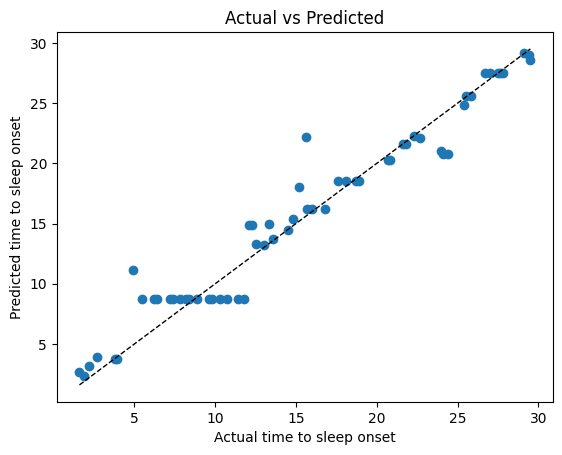

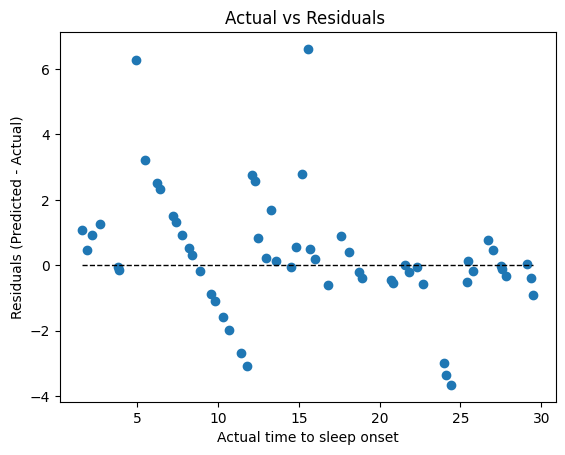

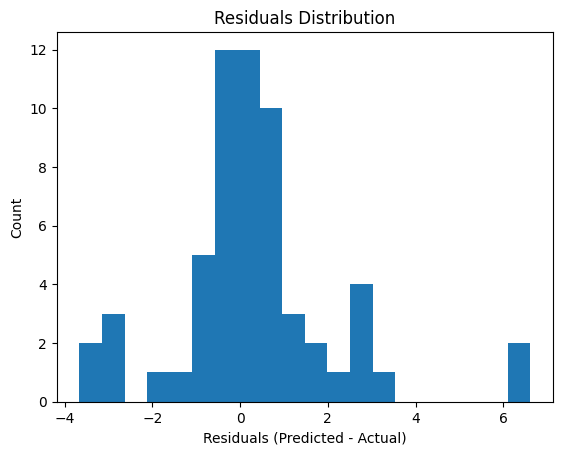

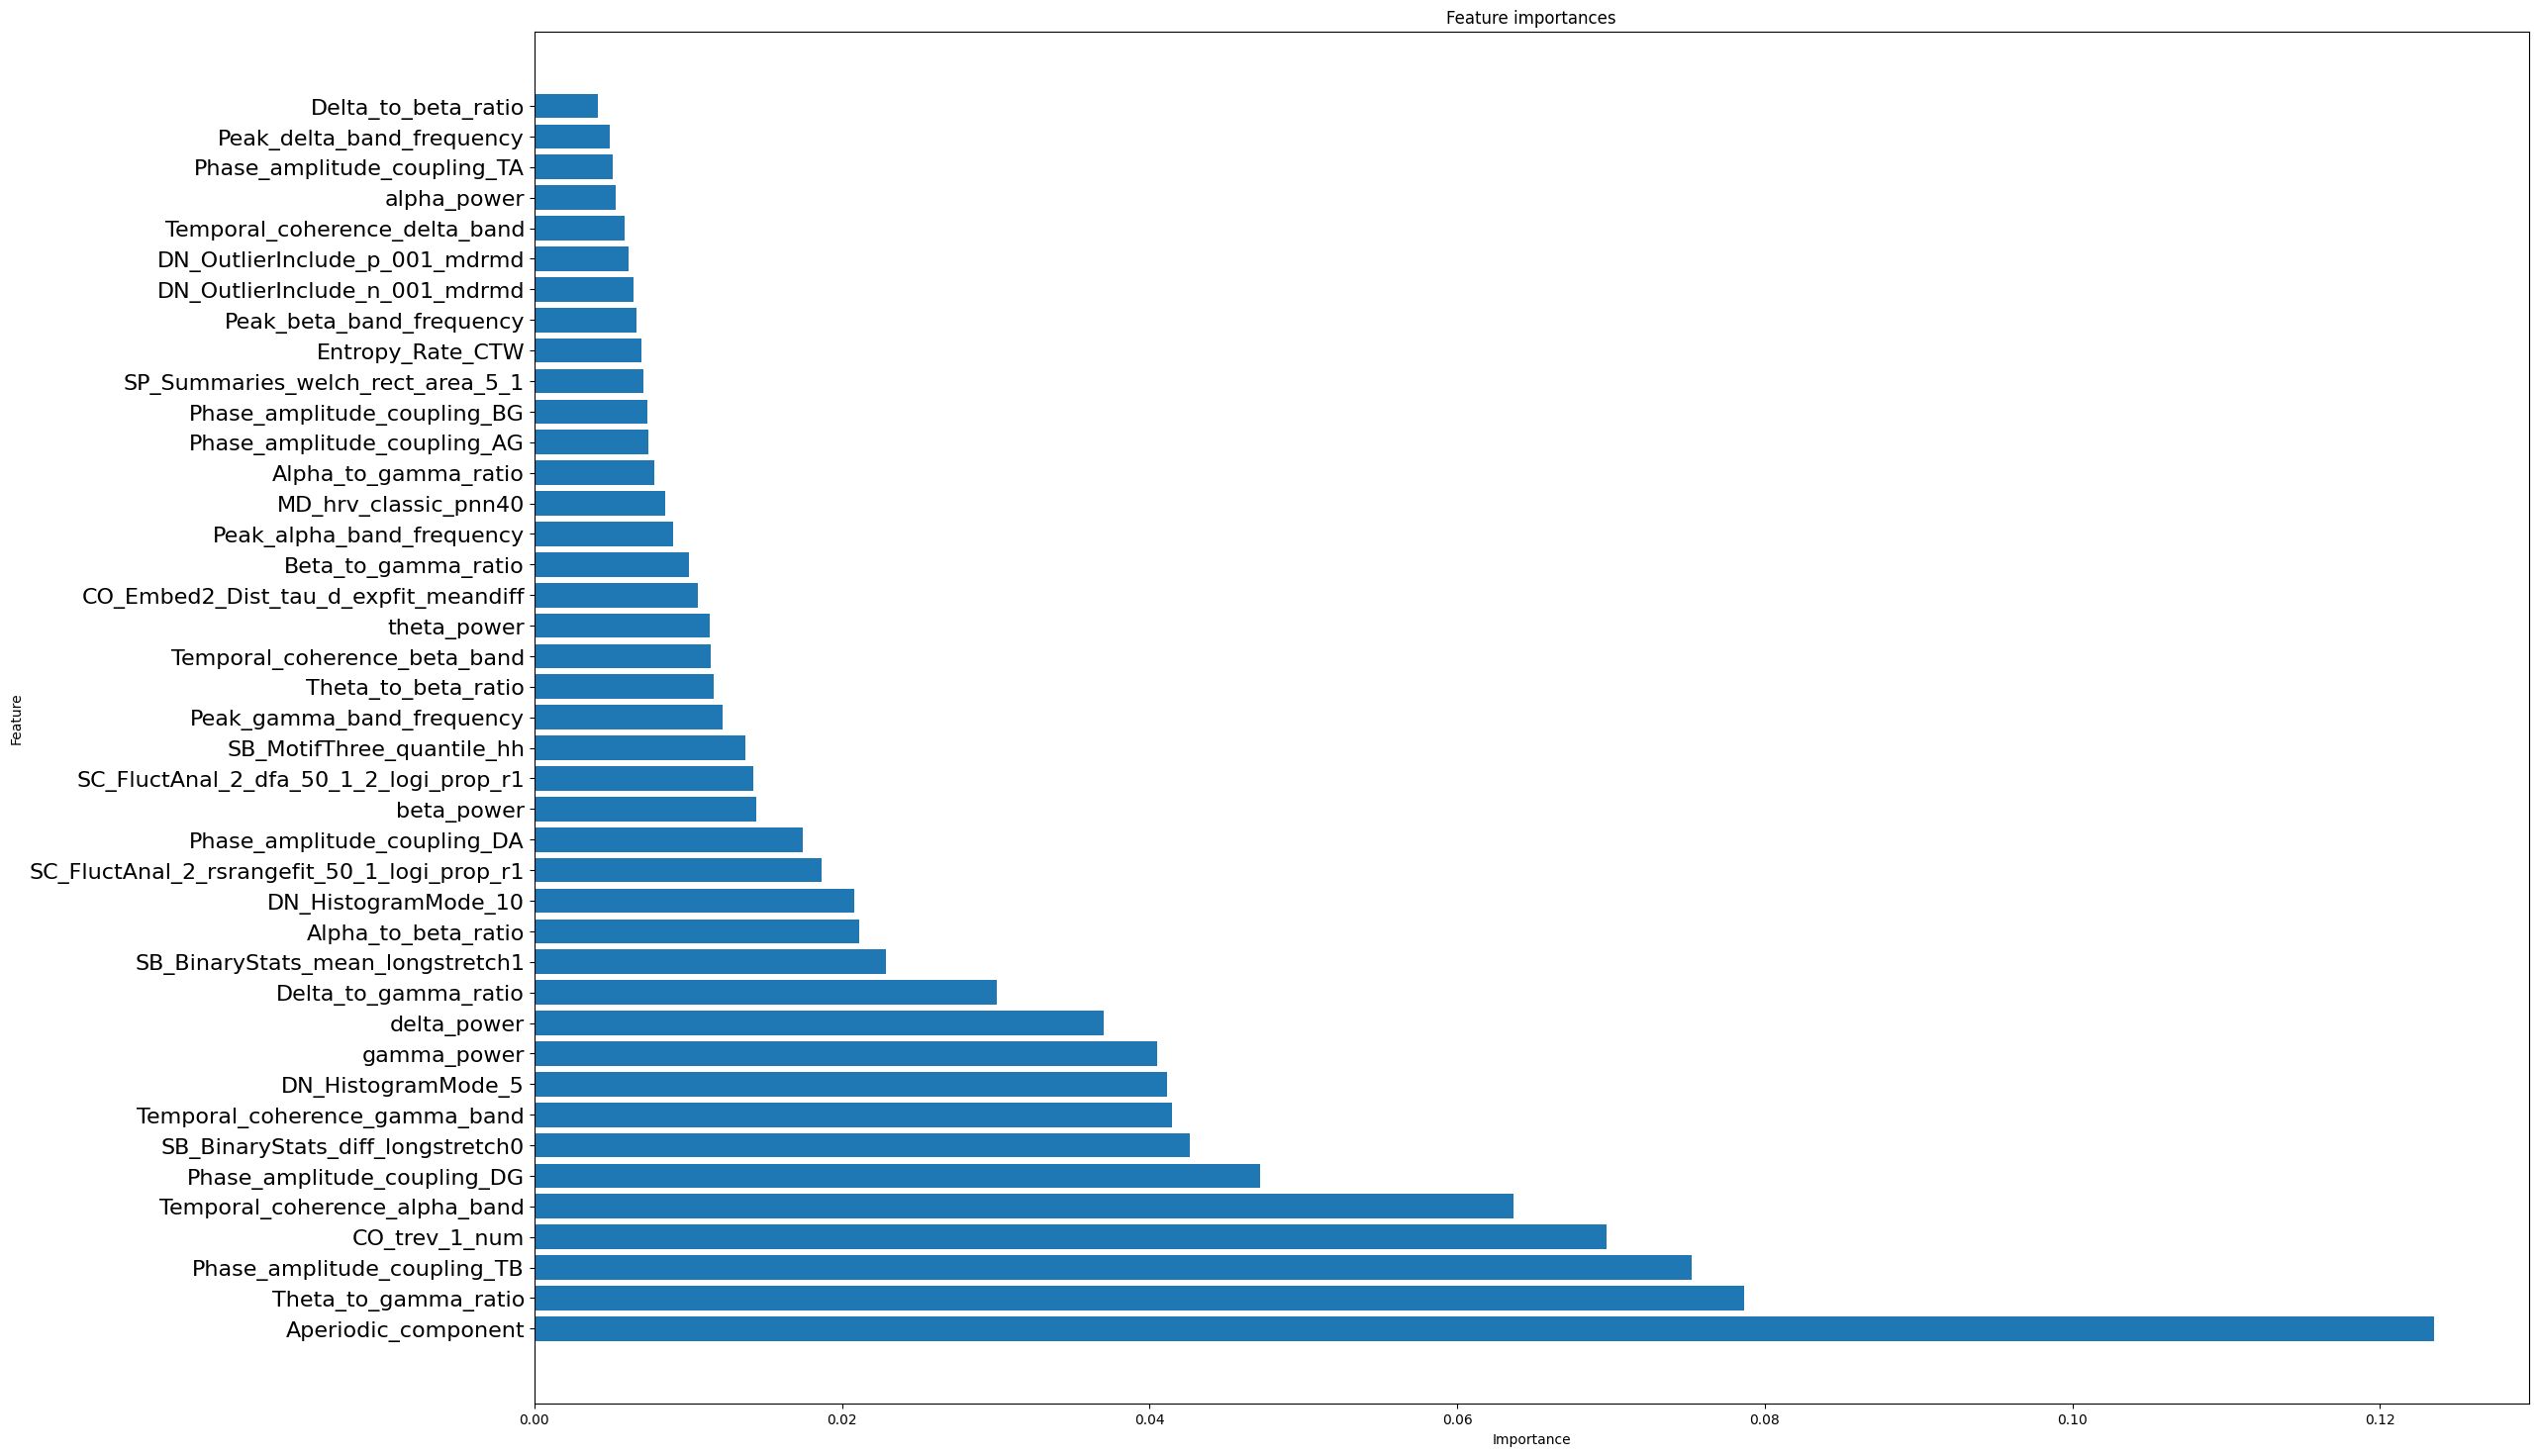

In [ ]:
# Assess the model performance
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Make predictions using the tuned model
predictions = rf_regressor_random.predict(X_test_after_selection)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared score
r2 = r2_score(y_test, predictions)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Accuracy:', round(accuracy, 2), '%.')
print('Mean squared error: ', mse)
print('Root mean squared error: ', rmse)
print('R-squared score: ', r2)

# Plot predictions vs actual values with a reference line at y=x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.scatter(y_test, predictions)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted')
plt.show()


# Plot the residuals vs actual values
plt.plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=1)
plt.scatter(y_test, predictions - y_test)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Residuals (Predicted - Actual)')
plt.title('Actual vs Residuals ')
plt.show()

# Plot the residuals distribution

plt.hist(predictions - y_test, bins=20)
plt.xlabel('Residuals (Predicted - Actual)')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.show()



# Plot the sorted feature importances in a long horizontal bar chart and increased font size

importances = rf_regressor_random.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_test_after_selection.columns[i] for i in indices]

fig, ax = plt.subplots(figsize=(26, 18))

ax.barh(range(X_test_after_selection.shape[1]), importances[indices], align='center')
ax.set_yticks(range(X_test_after_selection.shape[1]))
ax.set_yticklabels(names, fontsize=16)

ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature importances')
plt.show()



Mean Absolute Error: 1.12
Accuracy: 88.39 %.
Mean squared error:  3.1829251902988416
Root mean squared error:  1.7840754441163191
R-squared score:  0.9527700306147544


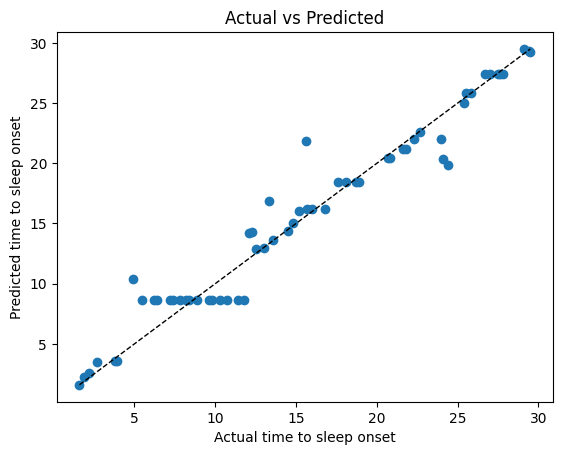

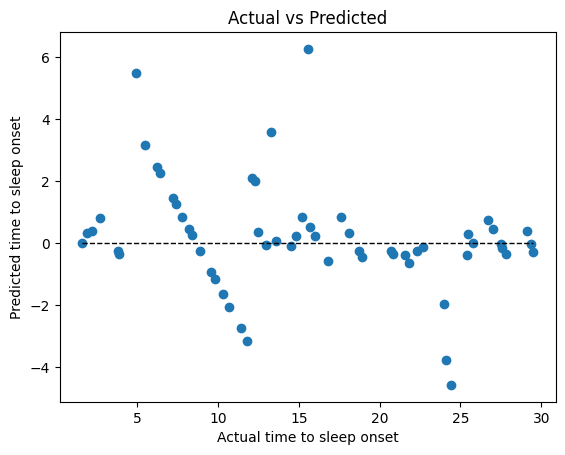

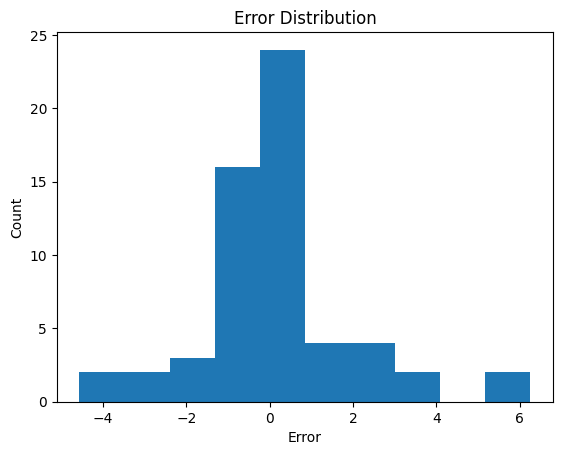

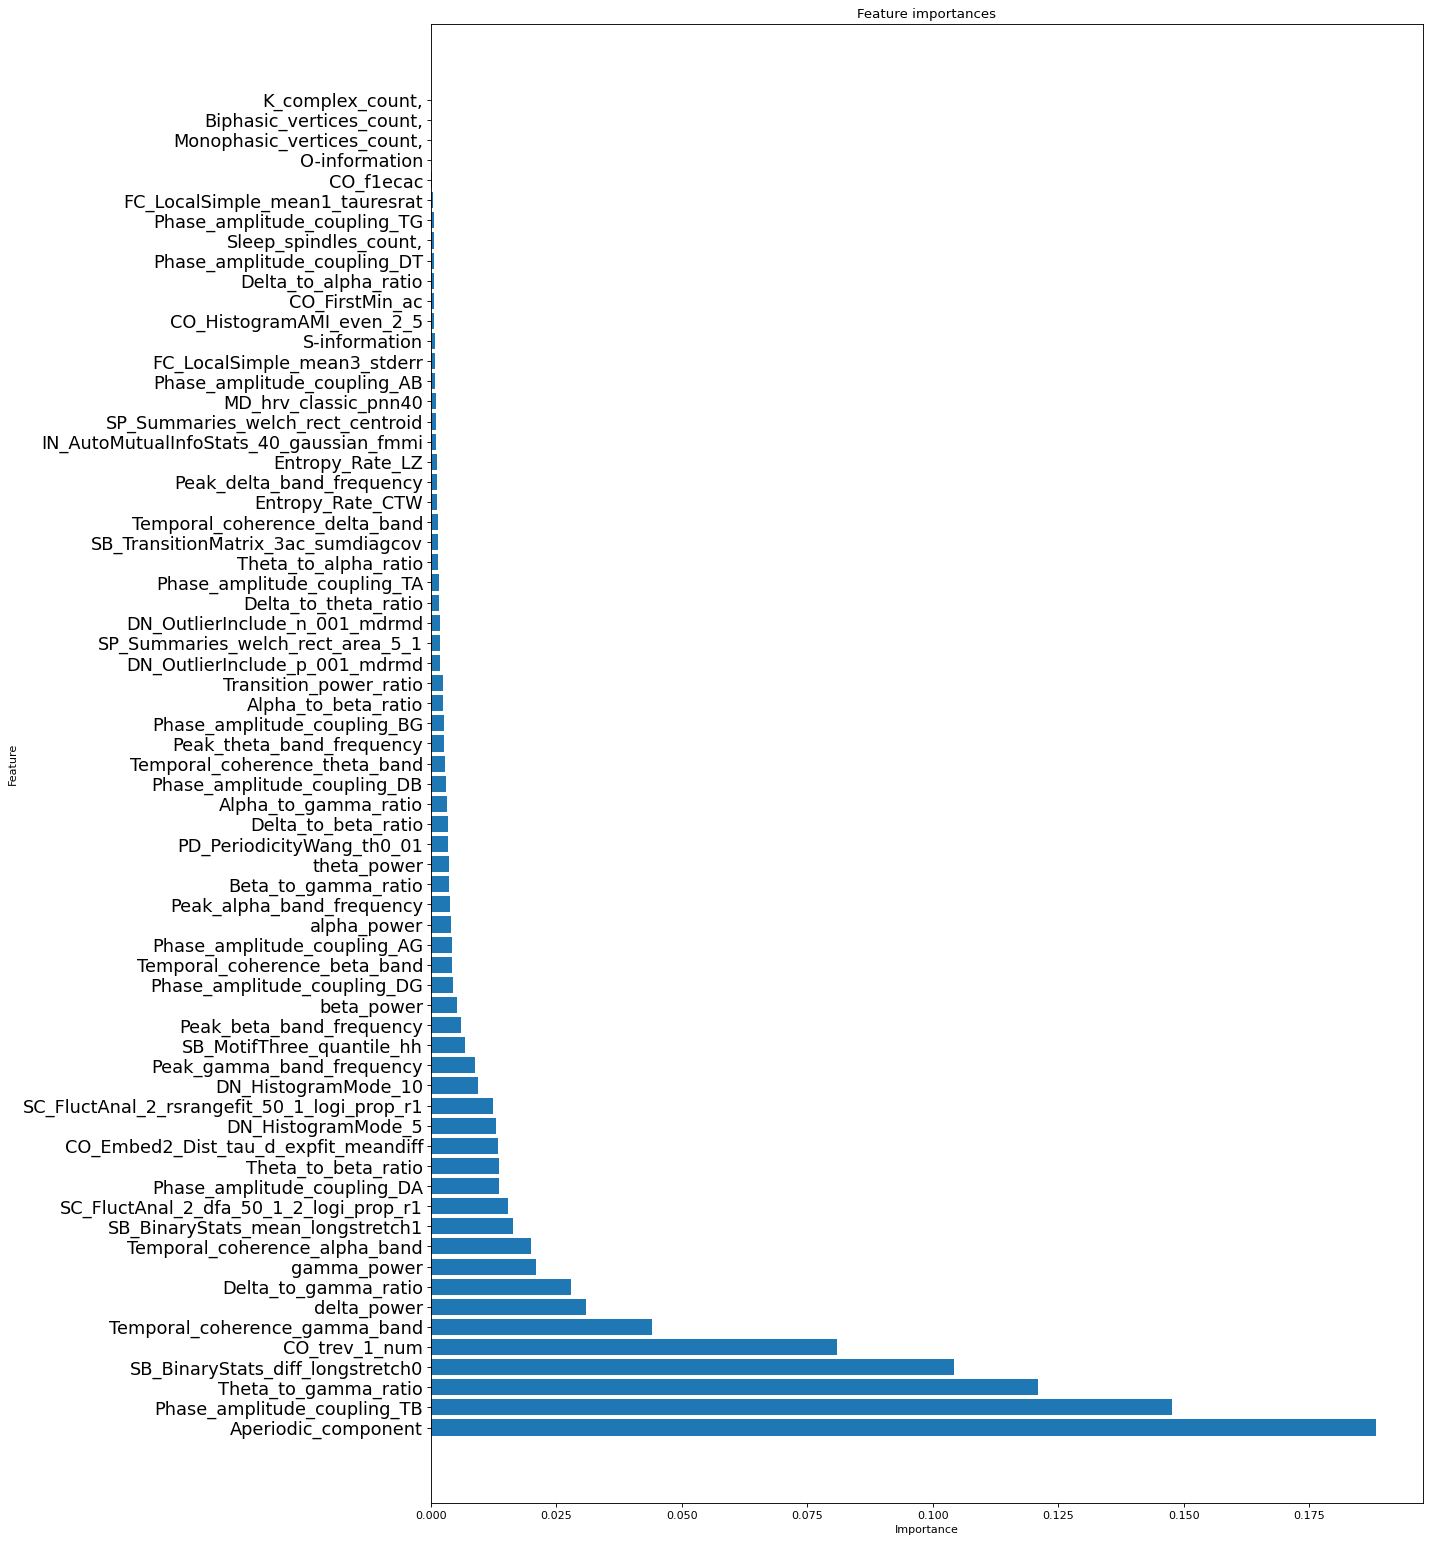

In [150]:
# Try a baseline model of random forest (before hyperparameter tuning) on the test set

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Make predictions using the untuned model
predictions = rf_regressor.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared score
r2 = r2_score(y_test, predictions)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Accuracy:', round(accuracy, 2), '%.')
print('Mean squared error: ', mse)
print('Root mean squared error: ', rmse)
print('R-squared score: ', r2)

# Plot predictions vs actual values with a reference line at y=x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.scatter(y_test, predictions)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted')
plt.show()


# Plot the residuals vs actual values
plt.plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=1)
plt.scatter(y_test, predictions - y_test)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted')
plt.show()

# Plot the residuals distribution
residuals = predictions - y_test
plt.hist(residuals)
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Error Distribution')
plt.show()

# Plot the sorted feature importances in a long horizontal bar chart and increased font size

importances_baseline = rf_regressor.feature_importances_

# sort the feature importances in descending order

indices = np.argsort(importances_baseline)[::-1]

# Rearrange the feature names so they match the sorted feature importances

names = [mydata.columns[i+2] for i in indices]

fig, ax = plt.subplots(figsize=(16, 24), dpi=80)

ax.barh(range(X.shape[1]), importances_baseline[indices], align='center')
ax.set_yticks(range(X.shape[1]))
ax.set_yticklabels(names, fontsize=16)

ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature importances')
plt.show()



In [28]:
# Try a random forest model with the best parameters from the random search on second half of the dataset (smaller label values)

# Split my data into halves with smaller and larger label values

mydata_small = mydata[mydata['Label'] < 15]
mydata_large = mydata[mydata['Label'] >= 15]

# Split the data into features and target label (features start from column 2)

X_small = mydata_small.iloc[:, 2:]
y_small = mydata_small.iloc[:, 0]

X_large = mydata_large.iloc[:, 2:]
y_large = mydata_large.iloc[:, 0]

# Split the data into training and testing sets
X_train_small_og, X_test_small_og, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

X_train_large_og, X_test_large_og, y_train_large, y_test_large= train_test_split(X_large, y_large, test_size=0.2, random_state=42)

# Leave only features that were selected as important in the previous step

X_train_small = X_train_small_og[X_train_after_selection.columns]
X_test_small = X_test_small_og[X_train_after_selection.columns]

X_train_large = X_train_large_og[X_train_after_selection.columns]
X_test_large = X_test_large_og[X_train_after_selection.columns]









Mean Absolute Error: 0.7
Accuracy: 86.96 %.
Mean squared error:  1.0490421310079063
Root mean squared error:  1.024227577742323
R-squared score:  0.934844702157531


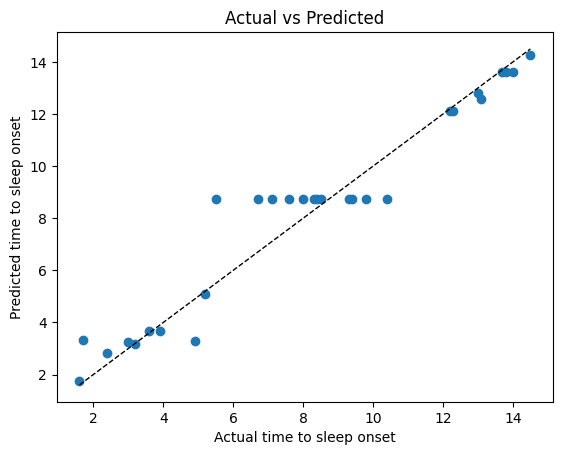

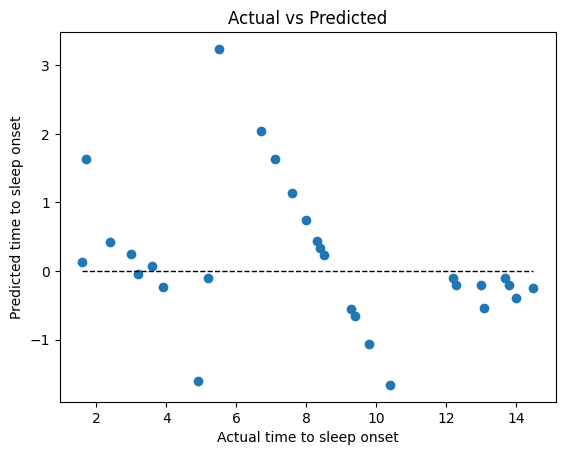

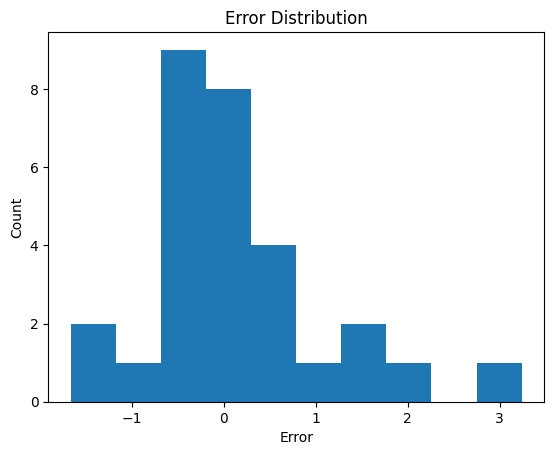

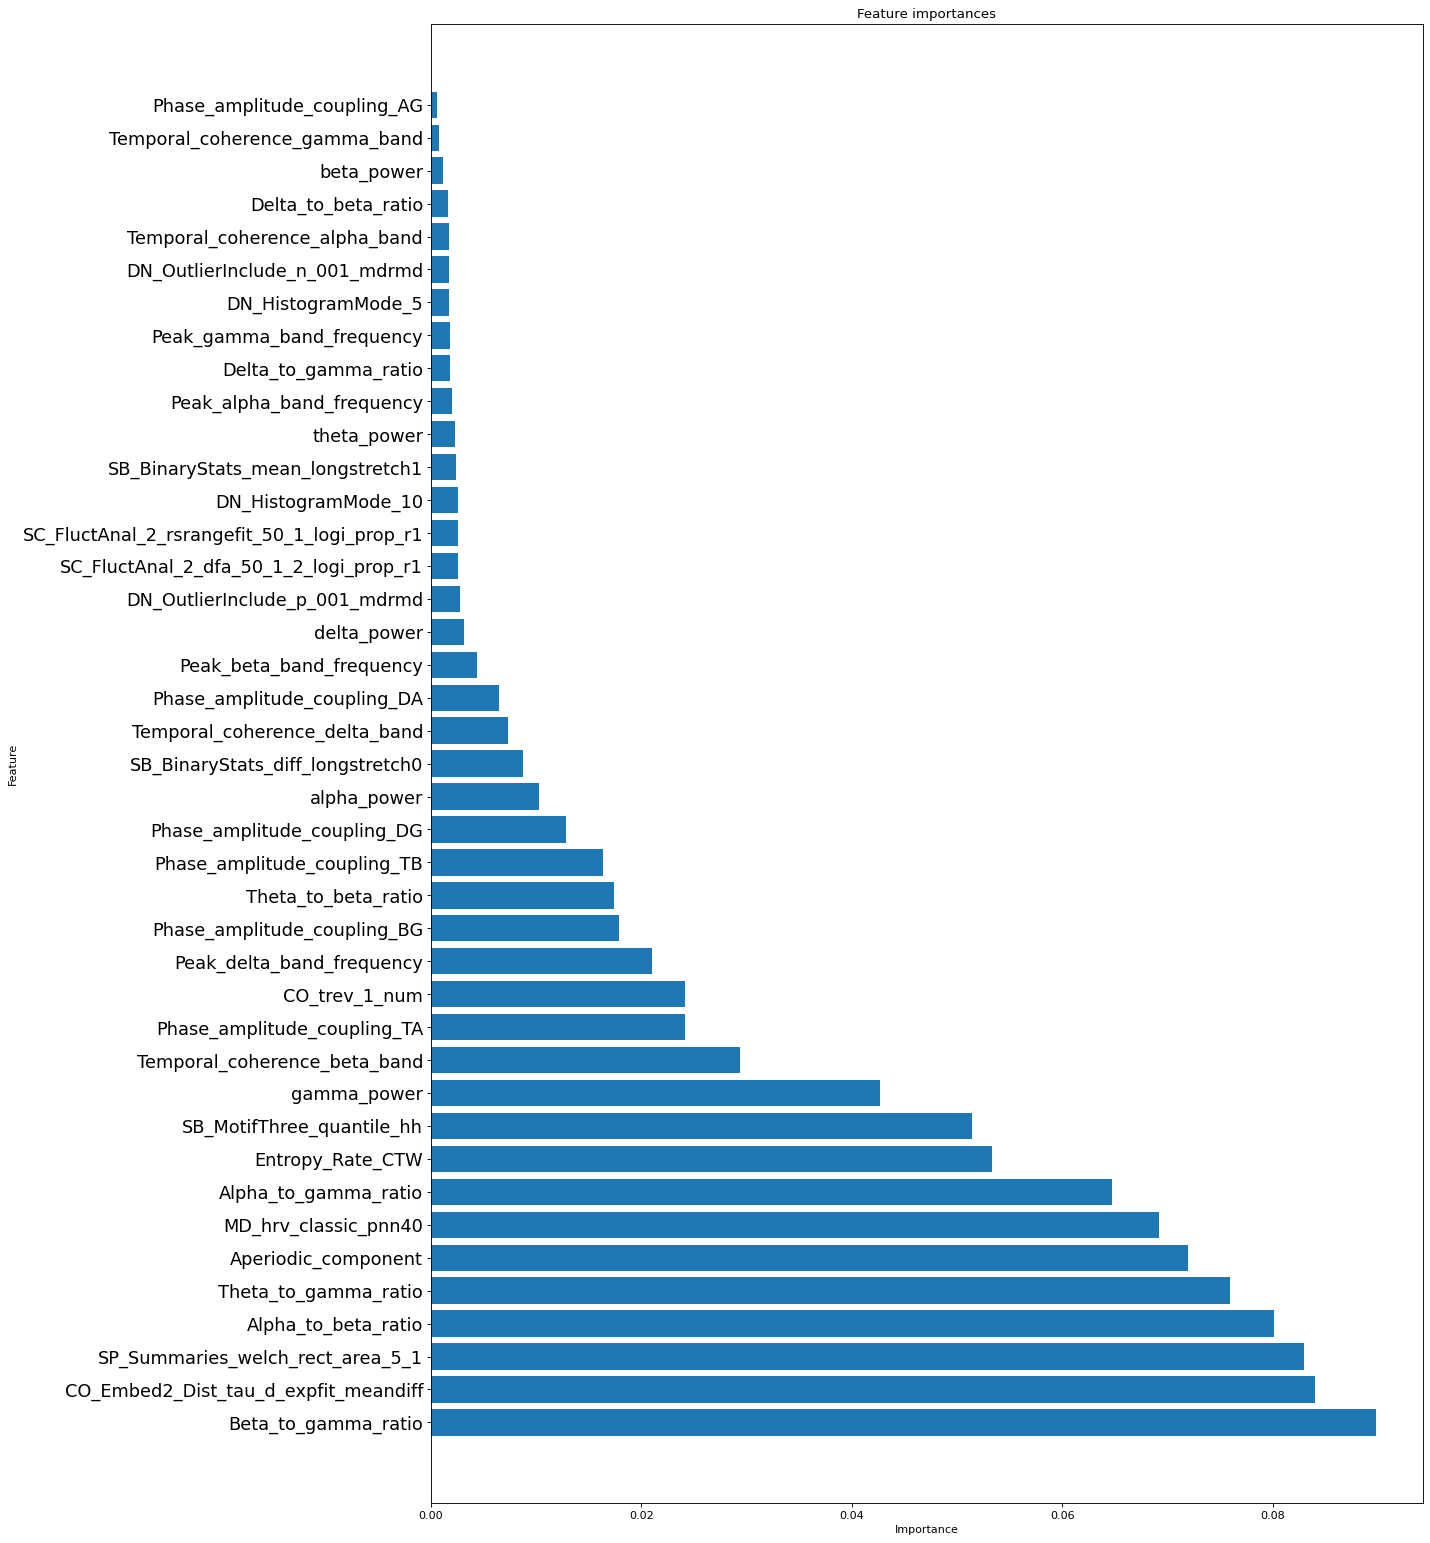

In [24]:
# Instantiate a random forest regressor object with the best parameters from the random search and selected features for the smaller label values
rf_regressor_small = RandomForestRegressor(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=80, bootstrap=False)

# Train the model on training data
rf_regressor_small.fit(X_train_small, y_train_small)

# Make predictions using the tuned model
predictions_small = rf_regressor_small.predict(X_test_small)

# Calculate the absolute errors
errors_small = abs(predictions_small - y_test_small)

# Calculate mean absolute percentage error (MAPE)
mape_small = 100 * (errors_small / y_test_small)

# Calculate and display accuracy
accuracy_small = 100 - np.mean(mape_small)

# Calculate mean squared error (MSE)
mse_small = mean_squared_error(y_test_small, predictions_small)

# Calculate root mean squared error (RMSE)
rmse_small = np.sqrt(mse_small)

# Calculate R-squared score
r2_small = r2_score(y_test_small, predictions_small)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors_small), 2))
print('Accuracy:', round(accuracy_small, 2), '%.')
print('Mean squared error: ', mse_small)
print('Root mean squared error: ', rmse_small)
print('R-squared score: ', r2_small)

# Plot predictions vs actual values with a reference line at y=x
plt.plot([y_test_small.min(), y_test_small.max()], [y_test_small.min(), y_test_small.max()], 'k--', lw=1)
plt.scatter(y_test_small, predictions_small)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted')
plt.show()


# Plot the residuals vs actual values
plt.plot([y_test_small.min(), y_test_small.max()], [0, 0], 'k--', lw=1)
plt.scatter(y_test_small, predictions_small - y_test_small)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted')
plt.show()

# Plot the residuals distribution
residuals_small = predictions_small - y_test_small
plt.hist(residuals_small)
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Error Distribution')
plt.show()

# Plot the sorted feature importances in a long horizontal bar chart and increased font size

importances_small = rf_regressor_small.feature_importances_

# sort the feature importances in descending order

indices = np.argsort(importances_small)[::-1]

# Rearrange the feature names so they match the sorted feature importances

names = [X_subset.columns[i] for i in indices]

fig, ax = plt.subplots(figsize=(16, 24), dpi=80)

ax.barh(range(X_test_small.shape[1]), importances_small[indices], align='center')
ax.set_yticks(range(X_test_small.shape[1]))
ax.set_yticklabels(names, fontsize=16)

ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature importances')
plt.show()





Mean Absolute Error: 0.9
Accuracy: 95.89 %.
Mean squared error:  3.018164984078776
Root mean squared error:  1.7372866729698861
R-squared score:  0.8439220125886839


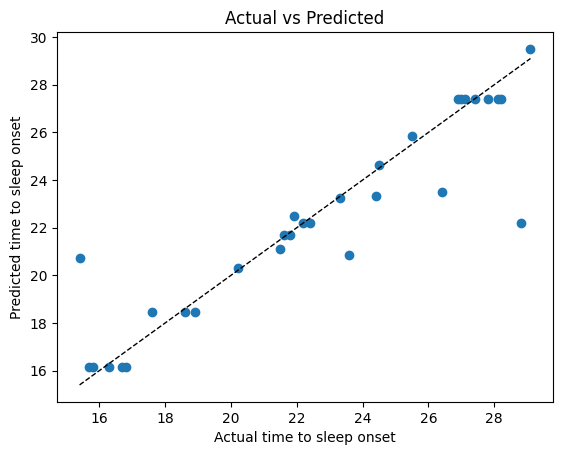

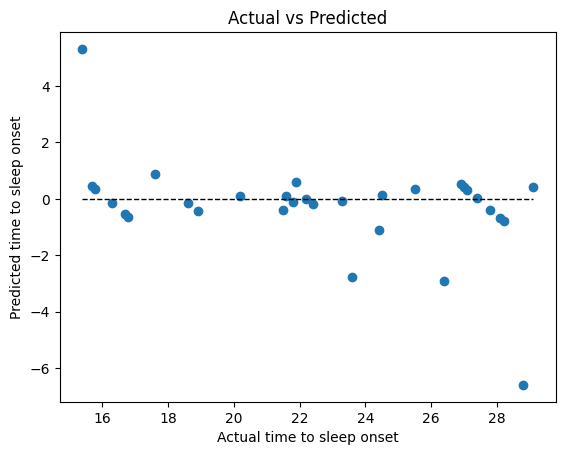

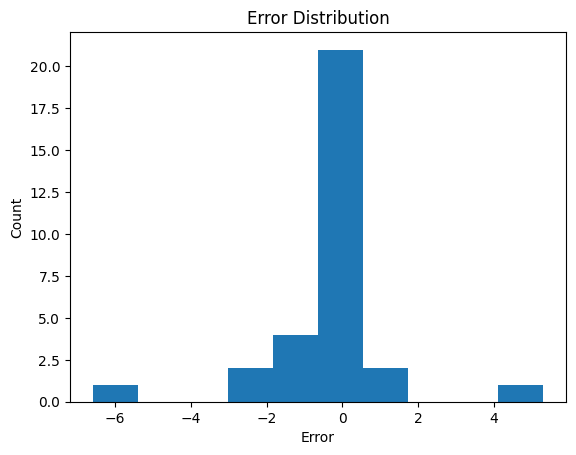

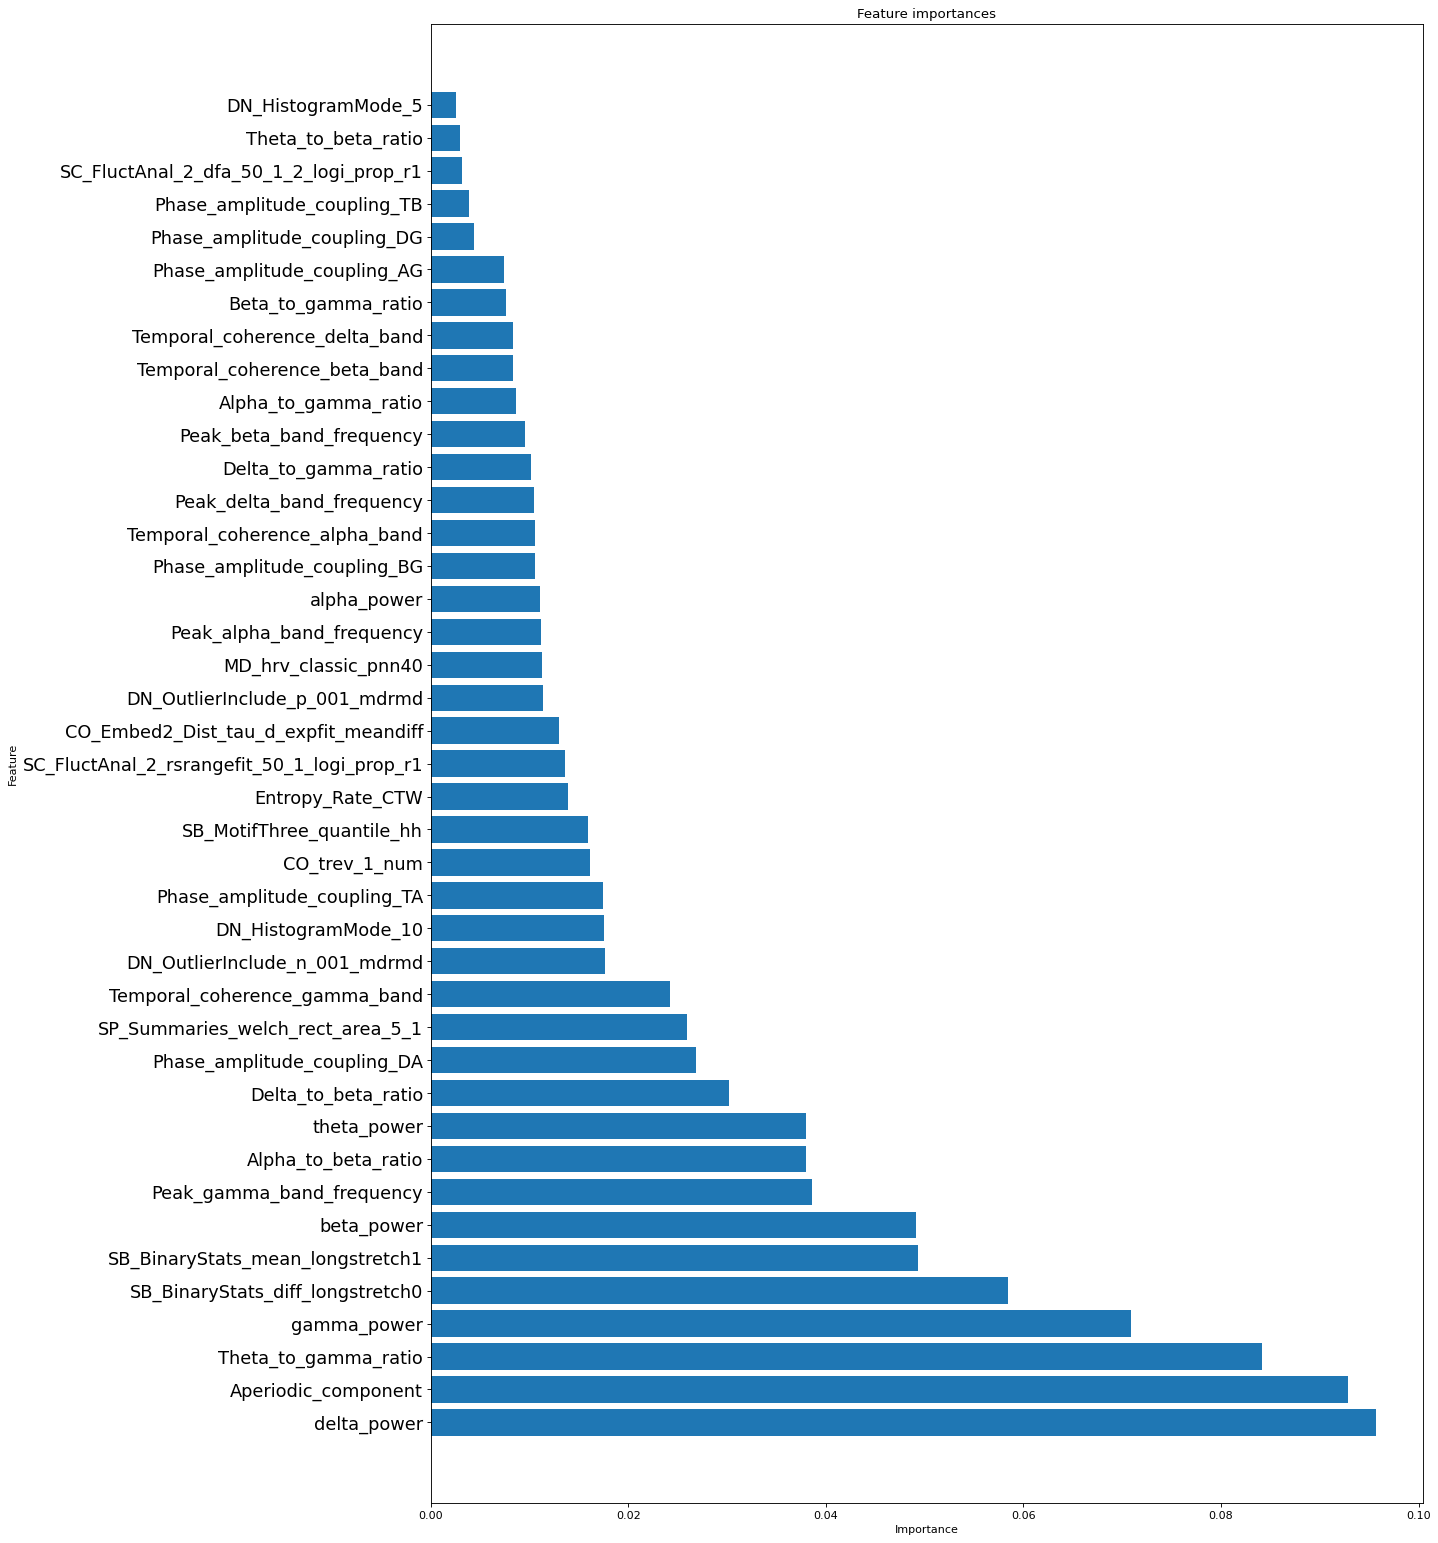

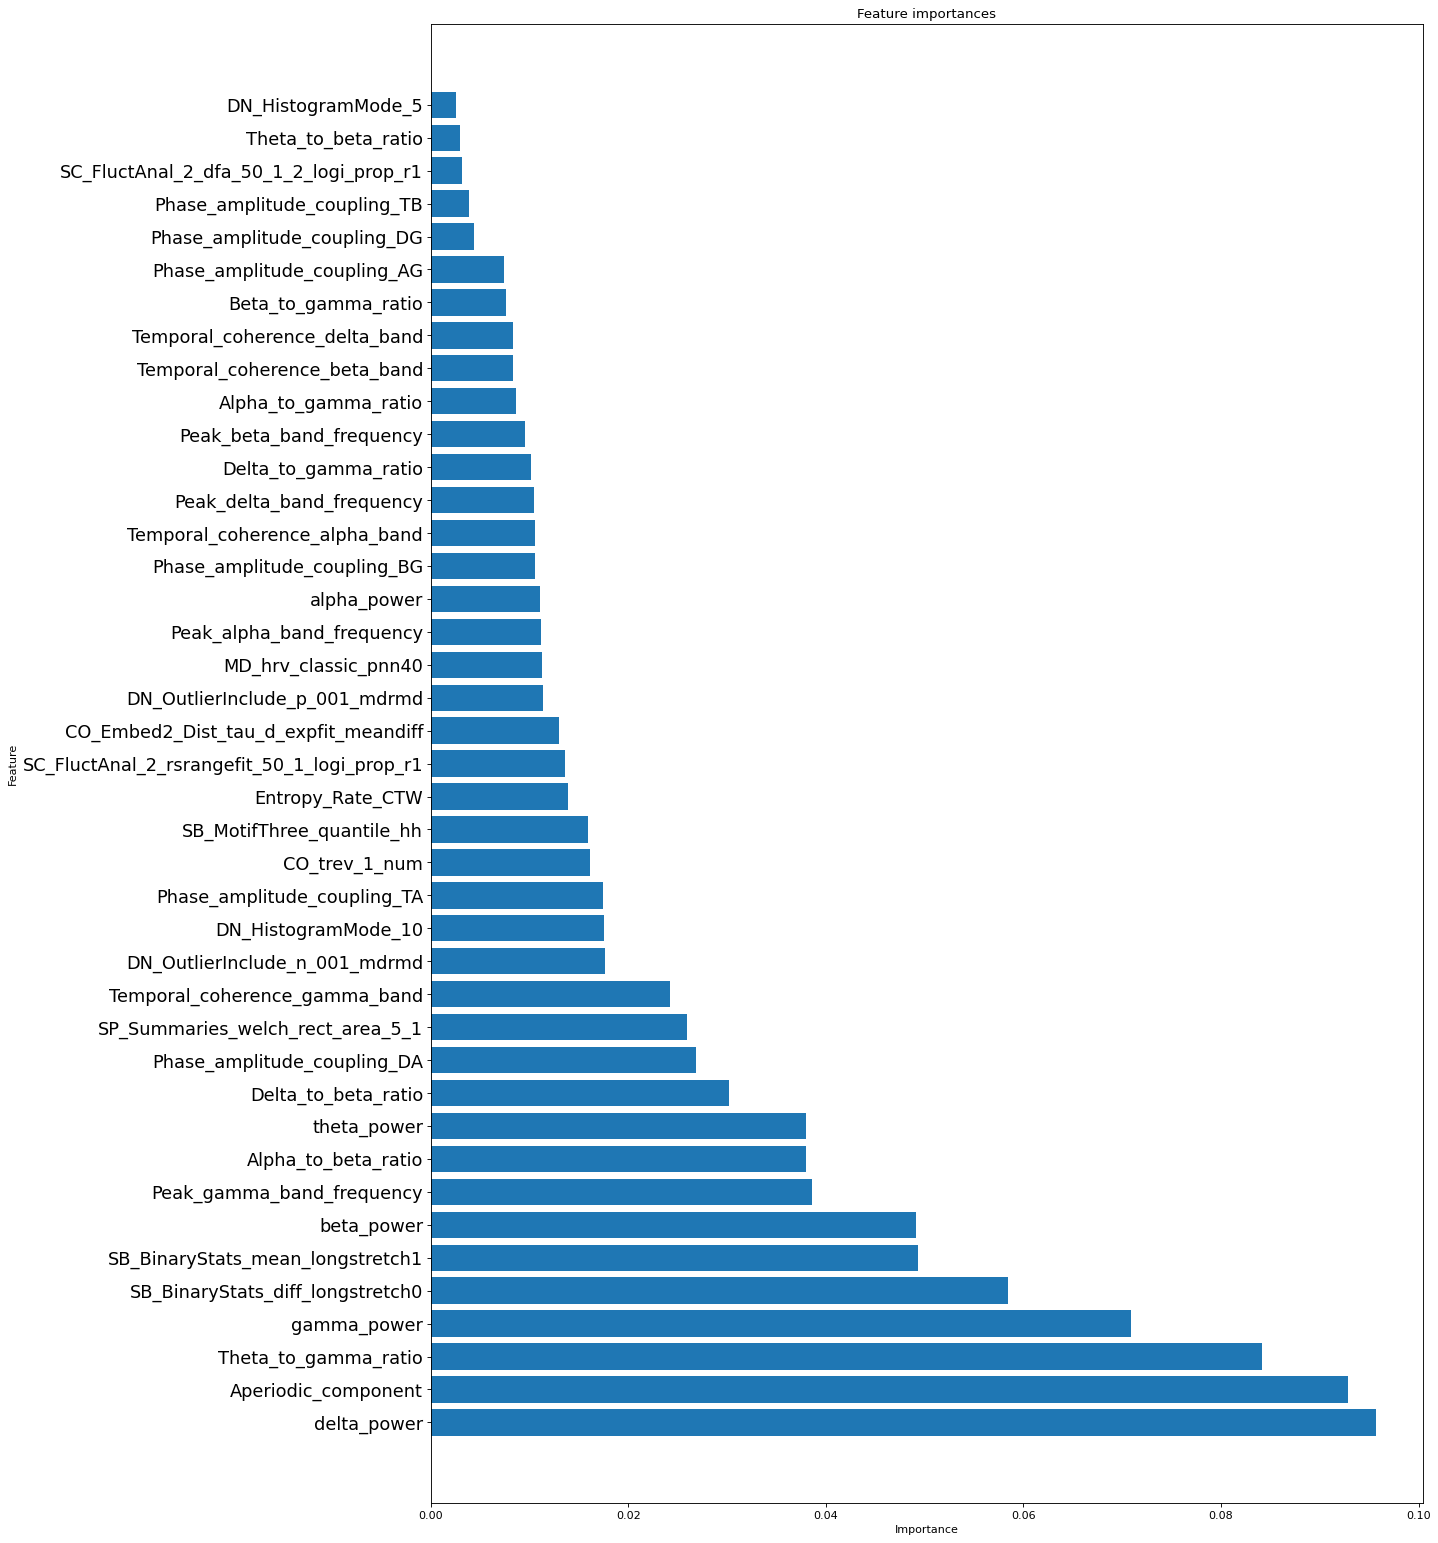

In [25]:
# Now do the same for the larger label values

# Instantiate a random forest regressor object with the best parameters from the random search and selected features for the larger label values
rf_regressor_large = RandomForestRegressor(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=80, bootstrap=False)

# Train the model on training data
rf_regressor_large.fit(X_train_large, y_train_large)

# Make predictions using the tuned model
predictions_large = rf_regressor_large.predict(X_test_large)

# Calculate the absolute errors

errors_large = abs(predictions_large - y_test_large)

# Calculate mean absolute percentage error (MAPE)
mape_large = 100 * (errors_large / y_test_large)

# Calculate and display accuracy
accuracy_large = 100 - np.mean(mape_large)


# Calculate mean squared error (MSE)
mse_large = mean_squared_error(y_test_large, predictions_large)

# Calculate root mean squared error (RMSE)
rmse_large = np.sqrt(mse_large)

# Calculate R-squared score
r2_large = r2_score(y_test_large, predictions_large)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors_large), 2))
print('Accuracy:', round(accuracy_large, 2), '%.')
print('Mean squared error: ', mse_large)
print('Root mean squared error: ', rmse_large)
print('R-squared score: ', r2_large)

# Plot predictions vs actual values with a reference line at y=x
plt.plot([y_test_large.min(), y_test_large.max()], [y_test_large.min(), y_test_large.max()], 'k--', lw=1)
plt.scatter(y_test_large, predictions_large)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted')
plt.show()


# Plot the residuals vs actual values
plt.plot([y_test_large.min(), y_test_large.max()], [0, 0], 'k--', lw=1)
plt.scatter(y_test_large, predictions_large - y_test_large)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted')
plt.show()

# Plot the residuals distribution
residuals_large = predictions_large - y_test_large
plt.hist(residuals_large)
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Error Distribution')
plt.show()

# Plot the sorted feature importances in a long horizontal bar chart and increased font size

importances_large = rf_regressor_large.feature_importances_

# sort the feature importances in descending order

indices = np.argsort(importances_large)[::-1]

# Rearrange the feature names so they match the sorted feature importances

names = [X_subset.columns[i] for i in indices]

fig, ax = plt.subplots(figsize=(16, 24), dpi=80)

ax.barh(range(X_test_large.shape[1]), importances_large[indices], align='center')
ax.set_yticks(range(X_test_large.shape[1]))
ax.set_yticklabels(names, fontsize=16)

ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature importances')
plt.show()

# Plot the sorted feature importances in a long horizontal bar chart and increased font size

importances_large = rf_regressor_large.feature_importances_

# sort the feature importances in descending order

indices = np.argsort(importances_large)[::-1]

# Rearrange the feature names so they match the sorted feature importances

names = [X_subset.columns[i] for i in indices]

fig, ax = plt.subplots(figsize=(16, 24), dpi=80)


ax.barh(range(X_test_large.shape[1]), importances_large[indices], align='center')
ax.set_yticks(range(X_test_large.shape[1]))
ax.set_yticklabels(names, fontsize=16)

ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature importances')
plt.show()



Mean Absolute Error: 0.71
Accuracy: 86.48 %.
Mean squared error:  1.1107048017688699
Root mean squared error:  1.0538998063235754
R-squared score:  0.9310148753465405


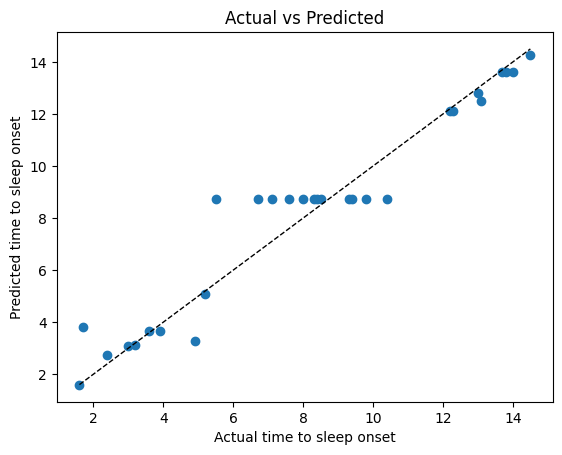

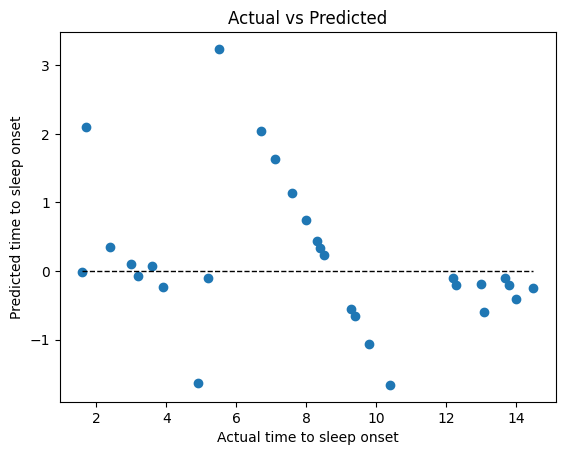

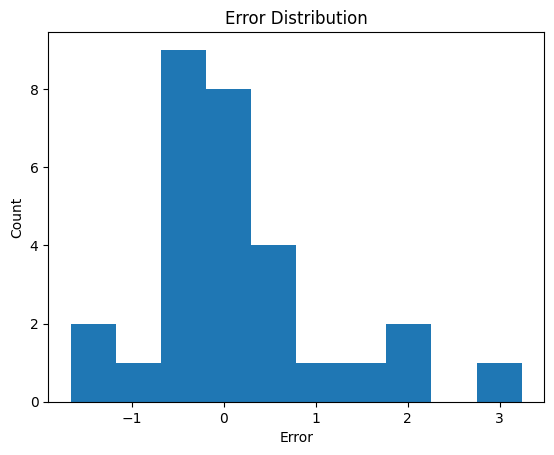

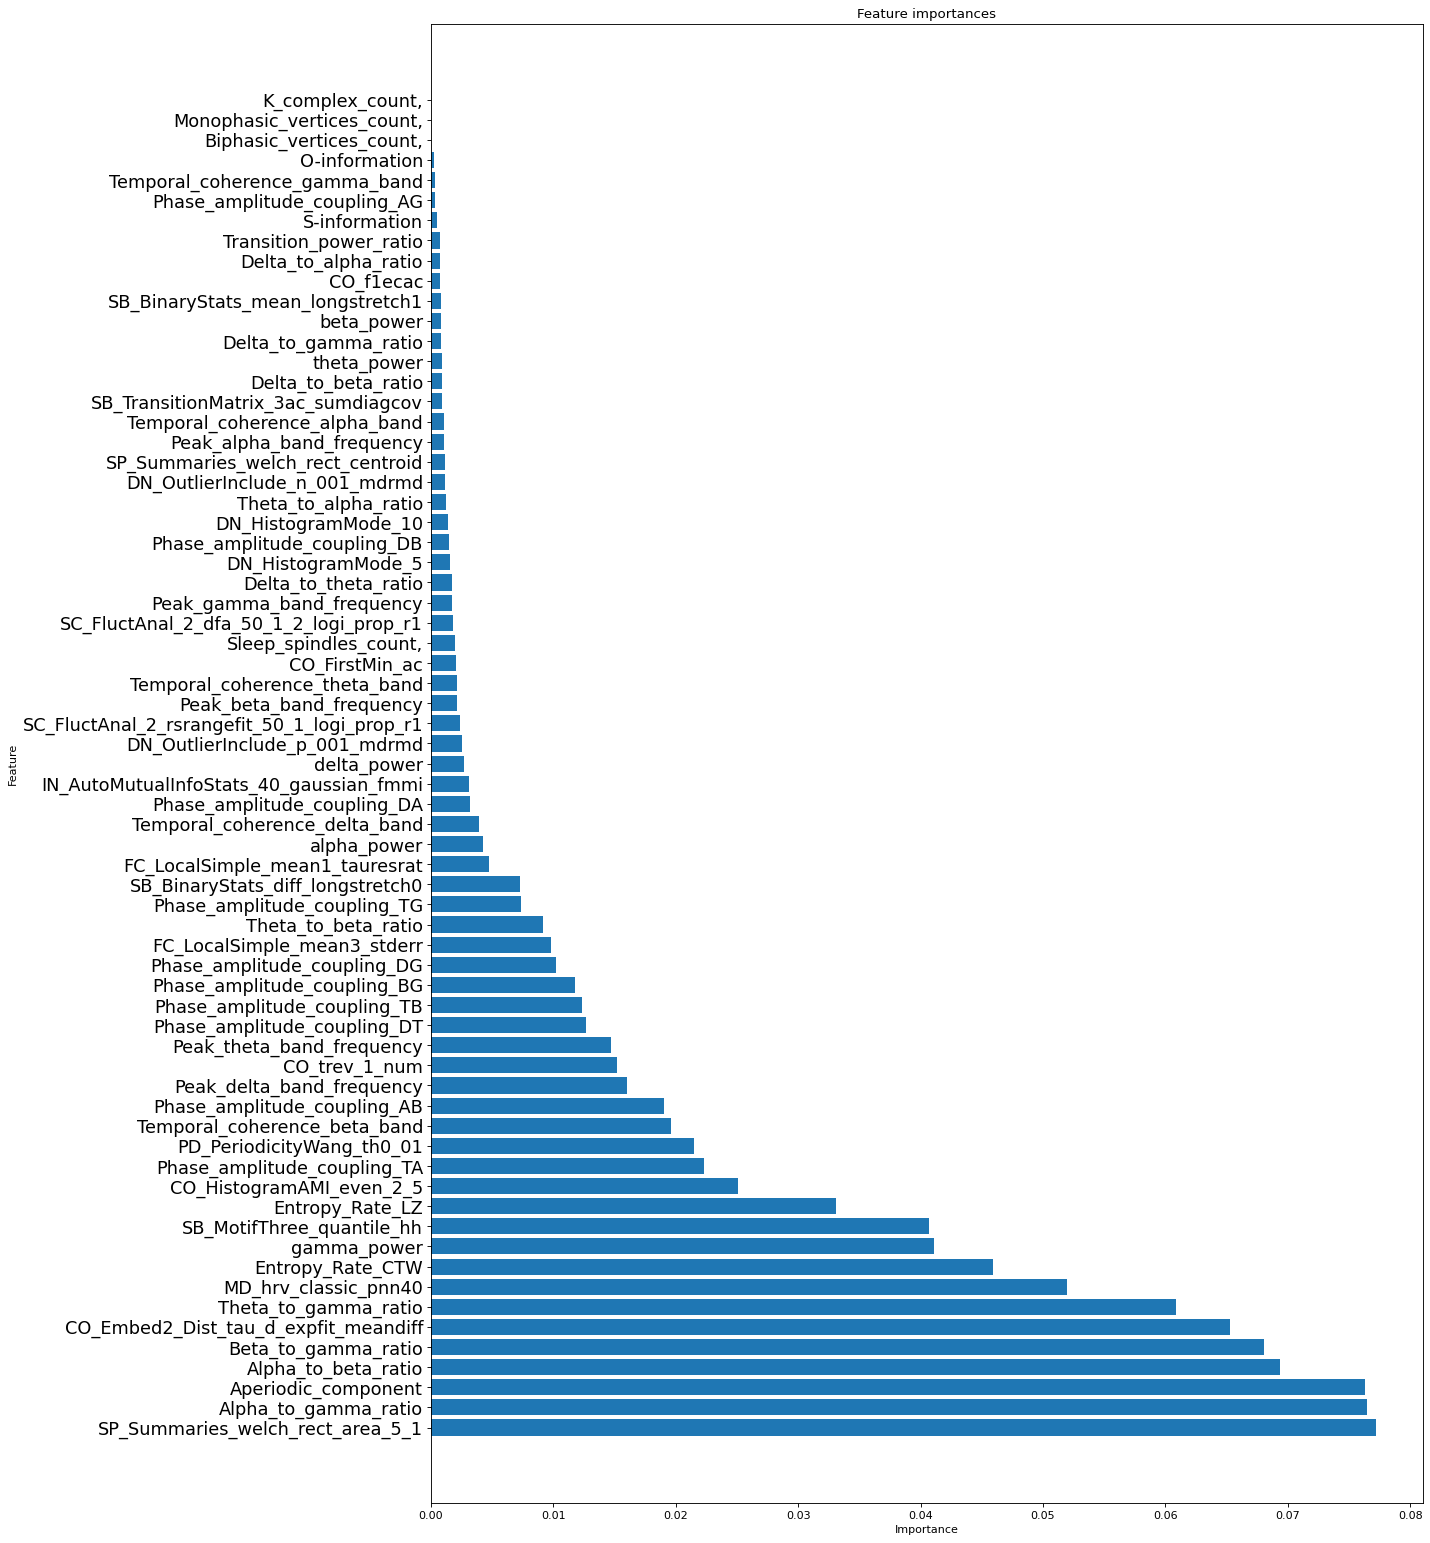

In [32]:
# Repeat analysis for the small and large label values using the best parameters from the grid search and no feature selection

# Instantiate a random forest regressor object with the best parameters from the grid search for the small label values

rf_regressor_small = RandomForestRegressor(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=80, bootstrap=False)

# Train the model on training data
rf_regressor_small.fit(X_train_small_og, y_train_small)

# Make predictions using the tuned model
predictions_small = rf_regressor_small.predict(X_test_small_og)

# Calculate the absolute errors

errors_small = abs(predictions_small - y_test_small)

# Calculate mean absolute percentage error (MAPE)
mape_small = 100 * (errors_small / y_test_small)

# Calculate and display accuracy
accuracy_small = 100 - np.mean(mape_small)


# Calculate mean squared error (MSE)
mse_small = mean_squared_error(y_test_small, predictions_small)

# Calculate root mean squared error (RMSE)
rmse_small = np.sqrt(mse_small)

# Calculate R-squared score
r2_small = r2_score(y_test_small, predictions_small)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors_small), 2))
print('Accuracy:', round(accuracy_small, 2), '%.')
print('Mean squared error: ', mse_small)
print('Root mean squared error: ', rmse_small)
print('R-squared score: ', r2_small)

# Plot predictions vs actual values with a reference line at y=x
plt.plot([y_test_small.min(), y_test_small.max()], [y_test_small.min(), y_test_small.max()], 'k--', lw=1)
plt.scatter(y_test_small, predictions_small)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted')
plt.show()


# Plot the residuals vs actual values
plt.plot([y_test_small.min(), y_test_small.max()], [0, 0], 'k--', lw=1)
plt.scatter(y_test_small, predictions_small - y_test_small)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted')
plt.show()

# Plot the residuals distribution
residuals_small = predictions_small - y_test_small
plt.hist(residuals_small)
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Error Distribution')
plt.show()

# Plot the sorted feature importances in a long horizontal bar chart and increased font size

importances_small = rf_regressor_small.feature_importances_

# sort the feature importances in descending order

indices = np.argsort(importances_small)[::-1]

# Rearrange the feature names so they match the sorted feature importances


names = [mydata.columns[i+2] for i in indices]

fig, ax = plt.subplots(figsize=(16, 24), dpi=80)

ax.barh(range(X_test_small_og.shape[1]), importances_small[indices], align='center')
ax.set_yticks(range(X_test_small_og.shape[1]))
ax.set_yticklabels(names, fontsize=16)

ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature importances')
plt.show()



Mean Absolute Error: 0.85
Accuracy: 96.11 %.
Mean squared error:  2.8532212940992596
Root mean squared error:  1.689148097148163
R-squared score:  0.852451724948347


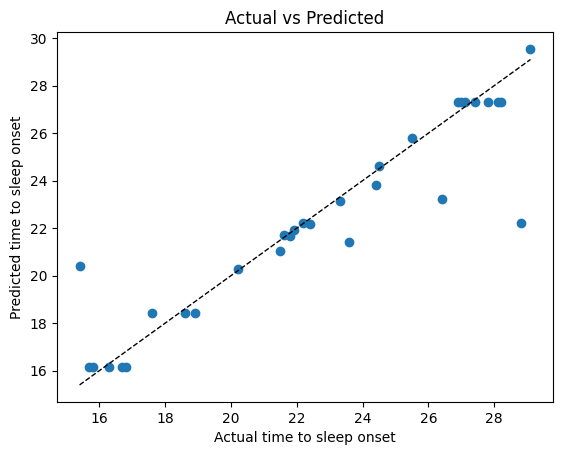

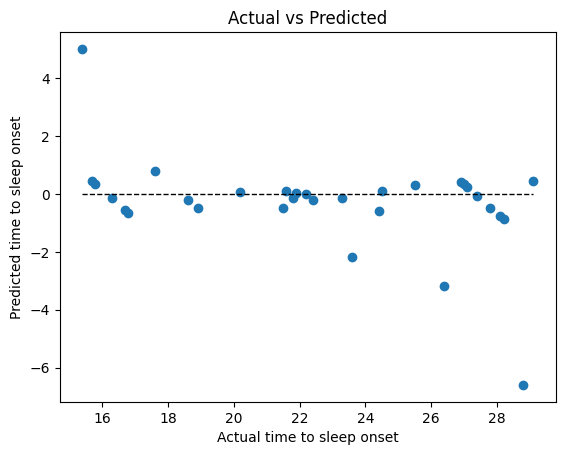

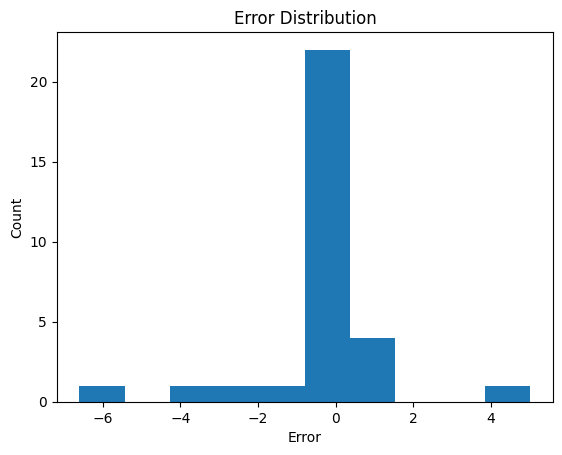

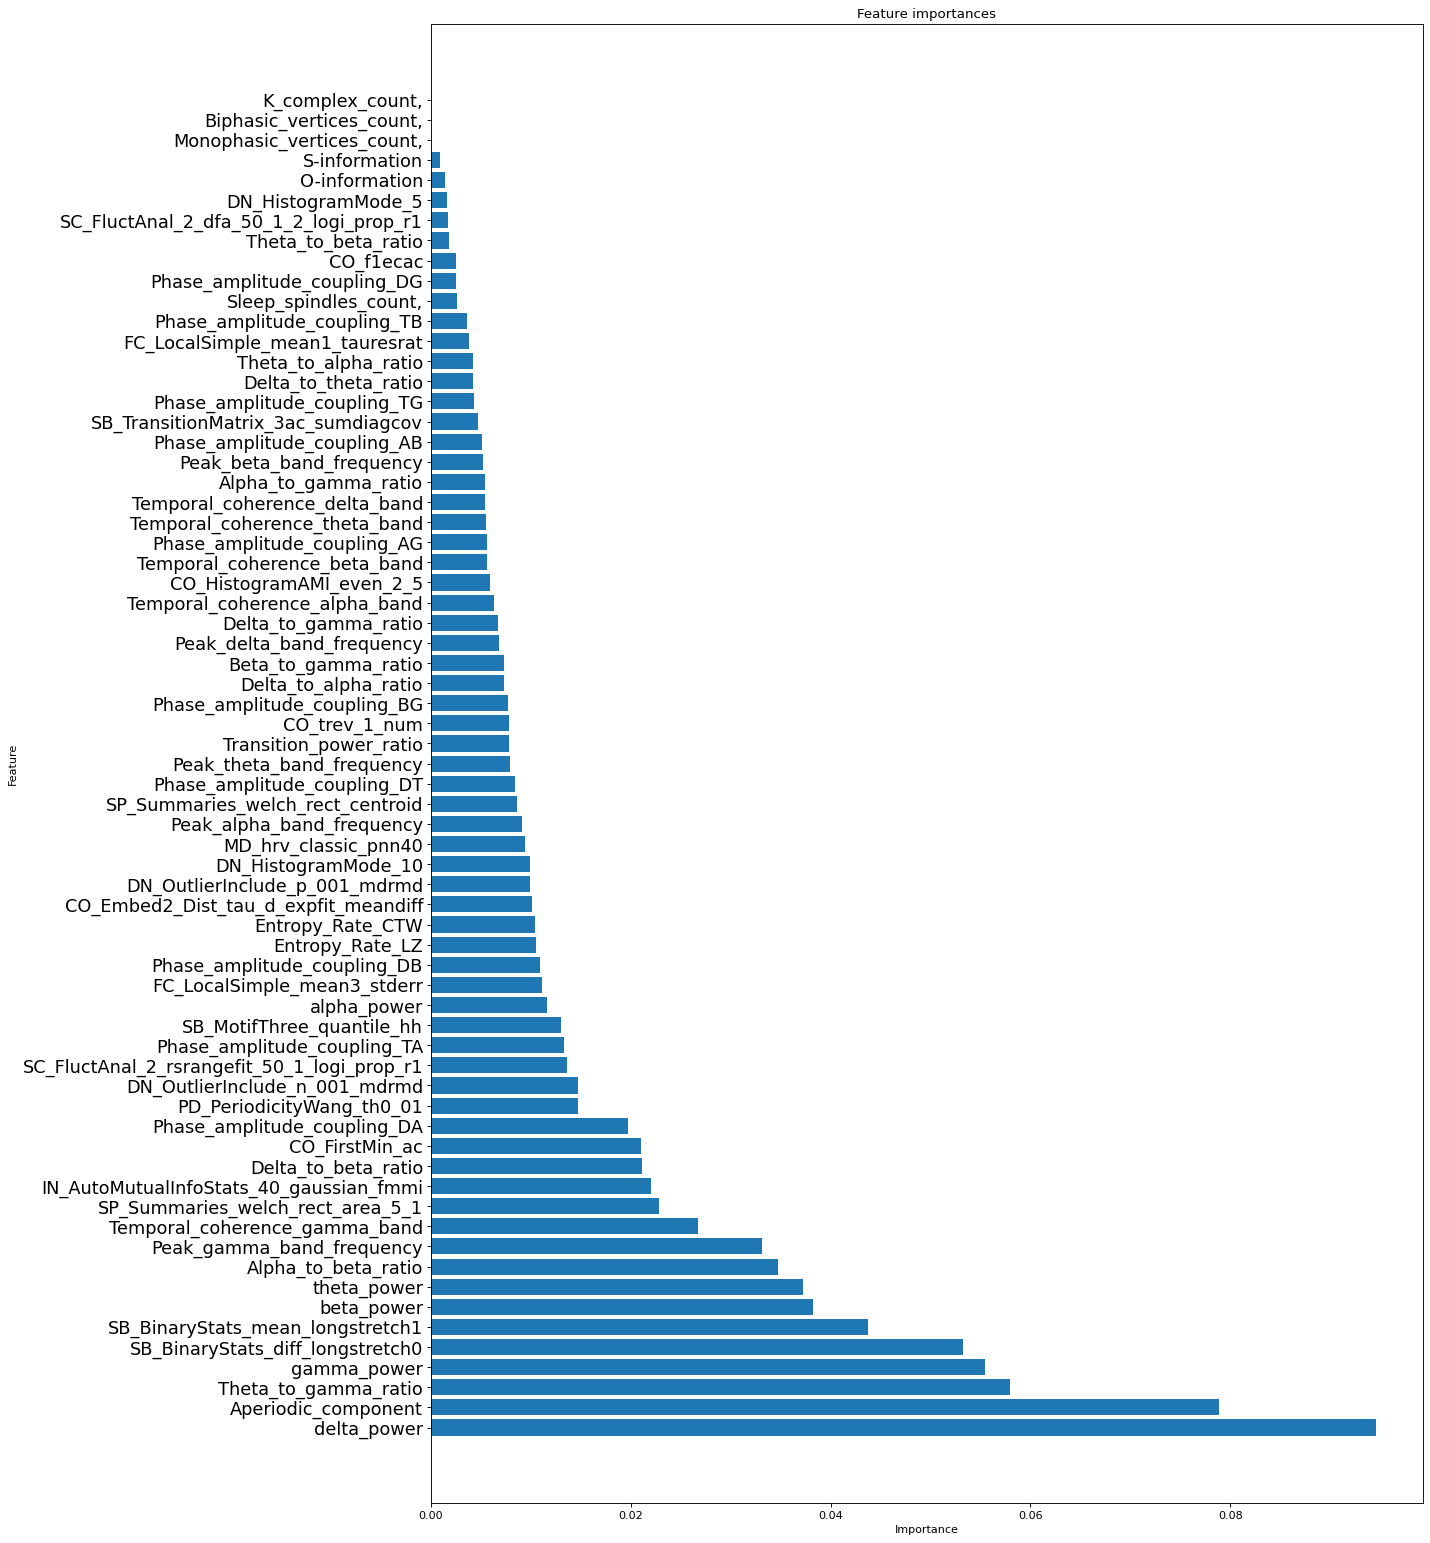

In [33]:
# Instantiate a random forest regressor object with the best parameters from the grid search for the large label values

rf_regressor_large = RandomForestRegressor(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=80, bootstrap=False)

# Train the model on training data
rf_regressor_large.fit(X_train_large_og, y_train_large)

# Make predictions using the tuned model
predictions_large = rf_regressor_large.predict(X_test_large_og)

# Calculate the absolute errors

errors_large = abs(predictions_large - y_test_large)

# Calculate mean absolute percentage error (MAPE)

mape_large = 100 * (errors_large / y_test_large)

# Calculate and display accuracy

accuracy_large = 100 - np.mean(mape_large)

# Calculate mean squared error (MSE)

mse_large = mean_squared_error(y_test_large, predictions_large)

# Calculate root mean squared error (RMSE)

rmse_large = np.sqrt(mse_large)

# Calculate R-squared score

r2_large = r2_score(y_test_large, predictions_large)

# Display the performance metrics

print('Mean Absolute Error:', round(np.mean(errors_large), 2))
print('Accuracy:', round(accuracy_large, 2), '%.')
print('Mean squared error: ', mse_large)
print('Root mean squared error: ', rmse_large)
print('R-squared score: ', r2_large)

# Plot predictions vs actual values with a reference line at y=x

plt.plot([y_test_large.min(), y_test_large.max()], [y_test_large.min(), y_test_large.max()], 'k--', lw=1)
plt.scatter(y_test_large, predictions_large)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted')
plt.show()


# Plot the residuals vs actual values

plt.plot([y_test_large.min(), y_test_large.max()], [0, 0], 'k--', lw=1)
plt.scatter(y_test_large, predictions_large - y_test_large)
plt.xlabel('Actual time to sleep onset')
plt.ylabel('Predicted time to sleep onset')
plt.title('Actual vs Predicted')
plt.show()

# Plot the residuals distribution

residuals_large = predictions_large - y_test_large
plt.hist(residuals_large)
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Error Distribution')
plt.show()

# Plot the sorted feature importances in a long horizontal bar chart and increased font size

importances_large = rf_regressor_large.feature_importances_

# sort the feature importances in descending order

indices = np.argsort(importances_large)[::-1]

# Rearrange the feature names so they match the sorted feature importances


names = [mydata.columns[i+2] for i in indices]

fig, ax = plt.subplots(figsize=(16, 24), dpi=80)

ax.barh(range(X_test_large_og.shape[1]), importances_large[indices], align='center')
ax.set_yticks(range(X_test_large_og.shape[1]))
ax.set_yticklabels(names, fontsize=16)

ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature importances')
plt.show()



# Regression from a time-window of feature-based representation of EEG signal 

## Random forest

### Flatten the time-window in a feature vector (e.g. if we have 67 features for 10 epochs, it would have length of 670 features) 
###





Drawbacks: the model won't inherently understand the temporal relationship between the features in each segment, because it is seeing them as a flat set of features. This is limitation of models like random forest when used with the time series data. 

In [ ]:

# Flatten the segmented data into 2D array, which is required by RandomForestRegressor
X = X.reshape(1000, -1)

# Split the data in the train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set (initial results)
# predictions = rf_regressor.predict(X_test)

In [ ]:
# Get feature importances
importances = rf_regressor.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({"feature": df.columns, "importance": importances})

# Sort the DataFrame to show the features with the highest importance first
feature_importances = feature_importances.sort_values(by="importance", ascending=False)

print(feature_importances)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameters and their values
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(best_params)

# Using simple RNNs 

In [ ]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame and the features are in the correct order
df.fillna(0, inplace=True)  # or df.fillna(df.mean(), inplace=True)

X = df.iloc[:, 4:].values  # features
y = df['Label'].values  # targets

# Normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape the features for RNN
X = X.reshape((-1, 67, 1))  # each sequence of 67 features is one sample

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32)

# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=50, batch_first=True)
        self.fc = nn.Linear(50, 1)

    def forward(self, x):
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1, :])  # only use the output from the last time step
        return x

model = RNNModel()

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Train the model
for epoch in range(10):
    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validate the model
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val.view(-1, 1))
        print(f'Epoch {epoch+1}/{10}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

# Evaluate the model
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test.view(-1, 1))
    print('Test MSE:', test_loss.item())

In [ ]:
import torch
from sklearn.model_selection import train_test_split

# Assuming `data` is your feature-based EEG segments and `targets` are your target values
X = data.reshape((n_samples, n_timesteps, n_features))
y = targets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)





In [ ]:
# Define the class

class SimpleRNN(nn.Module):
    def __init__(self, n_features):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size=n_features, hidden_size=50, num_layers=1, batch_first=True)
        self.fc = nn.Linear(50, 1)

    def forward(self, x):
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1, :])
        return x

model = SimpleRNN(n_features=67)

In [ ]:
# Compile and train
import torch.optim as optim

# Specify loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Train the model
for epoch in range(50):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

In [ ]:
# Evaluate
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    loss = criterion(outputs, y_test)

print(f'Test loss: {loss.item()}')